In [6]:
from optimization_template import *


depth = 2

theta_init = {**{"w{}".format(i+1): np.random.randn(2, 2) for i in range(depth-1)},
              "w{}".format(depth): np.random.randn(1, 2),
              **{"b{}".format(i+1): np.random.randn(2, 1) for i in range(depth-1)},
              "b{}".format(depth): np.random.randn(1, 1)}

theta = {'w1': np.array([[-0.65497431, -1.64259778],
                         [0.49698371,  1.53797914]]),
         'w2': np.array([[1.85627443, -0.50453944]]),
         'b1': np.array([[0.20787364],
                         [-0.63470021]]),
         'b2': np.array([[-1.82343559]])}

# create optimizer class
opt = optimizer(theta_init, depth)

# specify optimizer
opt.specify_optimizer("Adam", parameters={"lr": 0.0001, "delta": 1e-12, "rho1": 0.9, "rho2": 0.999})
opt.count = 1
if hasattr(opt, 'count'):
    opt.count = 1
    print("yes")
else:
    opt.count = opt.count + 1


yes


In [ ]:
"""
=============================================================================
    Eindhoven University of Technology
==============================================================================

    Source Name   : optimization_test_script.py
                    Main file for machine learning training
    Author        : Bart van Erp
    Modified by   : Nishith Chennakeshava
    Date          : 03/10/2019

==============================================================================
"""

# import libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
from copy import deepcopy

optimizer = __import__("optimization_template")
backprop = __import__("backprop_template")

# parameters for training
nr_epochs = 50000
batch_size = 100

# parameters for model
depth = 2

# load data
X = h5py.File('data.h5', 'r')['X']
y = h5py.File('data.h5', 'r')['y']

# initialize dictionary with all weigths
theta_init = {**{"w{}".format(i+1): np.random.randn(2, 2) for i in range(depth-1)},
              "w{}".format(depth): np.random.randn(1, 2),
              **{"b{}".format(i+1): np.random.randn(2, 1) for i in range(depth-1)},
              "b{}".format(depth): np.random.randn(1, 1)}

theta_init = {'w1': np.array([[-0.65497431, -1.64259778],
                         [0.49698371,  1.53797914]]),
         'w2': np.array([[1.85627443, -0.50453944]]),
         'b1': np.array([[0.20787364],
                         [-0.63470021]]),
         'b2': np.array([[-1.82343559]])}

# create optimizer class
opt = optimizer.optimizer(theta_init, depth)

# specify optimizer
opt.specify_optimizer("Adam", parameters={"lr": 0.0001, "delta": 1e-12, "rho1": 0.9, "rho2": 0.999})
#opt.specify_optimizer("SGD", parameters={"lr": 1})
#opt.specify_optimizer("AdaGrad", parameters={"lr": 0.0001, "delta": 1e-12})
#opt.specify_optimizer("RMSprop", parameters={"lr": 0.0001, "rho": 0.999, "delta": 1e-12})

# start training

J_array = np.array([])
W11_array = np.array([])
W12_array = np.array([])
W21_array = np.array([])
W22_array = np.array([])
W1_array = np.array([])
W2_array = np.array([])
B1_array = np.array([])
B2_array = np.array([])
b_array = np.array([])

print("start training...")
for epoch in range(nr_epochs):

    # loop through batches of data
    for batch in range(X.shape[1]//batch_size):

        # get batch of data
        X_batch = X[:, batch_size*batch:batch_size*(batch+1)]
        y_batch = y[:, batch_size*batch:batch_size*(batch+1)]

        # calculate gradients
        J, yhat, gradients = backprop.backprop(X_batch, y_batch, opt.theta, depth)
        gradients = optimizer.regularizer(gradients, opt.theta, 'l2', 0.1)


        # update parameters
        opt.optimize_weights(gradients)
        
    weights = deepcopy(opt.theta)

    J_array = np.append(J_array, J)
    W11 = weights["w1"][0,0]
    W11_array = np.append(W11_array, W11)
    W12 = weights["w1"][0,1]
    W12_array = np.append(W12_array, W12)
    W21 = weights["w1"][1,0]
    W21_array = np.append(W21_array, W21)
    W22 = weights["w1"][1,1]
    W22_array = np.append(W22_array, W22)
    W1 = weights["w2"][0,0]
    W1_array = np.append(W1_array, W1)
    W2 = weights["w2"][0,1]
    W2_array = np.append(W2_array, W2)
    B1 = weights["b1"][0,0]
    B1_array = np.append(B1_array, B1)
    B2 = weights["b1"][1,0]
    B2_array = np.append(B2_array, B2)
    b = weights["b2"][0,0]
    b_array = np.append(b_array, b)

    
    # print update
    print("epoch %3.0f: loss = %f" % (epoch+1, J))

c:\users\20174215\documents\vakken\master jaar 1\q4\5lsl0\git\5sls0\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\20174215\documents\vakken\master jaar 1\q4\5lsl0\git\5sls0\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\20174215\documents\vakken\master jaar 1\q4\5lsl0\git\5sls0\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


start training...
epoch   1: loss = 2.203594
epoch   2: loss = 2.203489
epoch   3: loss = 2.203347
epoch   4: loss = 2.203180
epoch   5: loss = 2.202995
epoch   6: loss = 2.202796
epoch   7: loss = 2.202586
epoch   8: loss = 2.202367
epoch   9: loss = 2.202142
epoch  10: loss = 2.201912
epoch  11: loss = 2.201678
epoch  12: loss = 2.201440
epoch  13: loss = 2.201200
epoch  14: loss = 2.200959
epoch  15: loss = 2.200716
epoch  16: loss = 2.200472
epoch  17: loss = 2.200228
epoch  18: loss = 2.199984
epoch  19: loss = 2.199740
epoch  20: loss = 2.199496
epoch  21: loss = 2.199253
epoch  22: loss = 2.199010
epoch  23: loss = 2.198768
epoch  24: loss = 2.198528
epoch  25: loss = 2.198288
epoch  26: loss = 2.198049
epoch  27: loss = 2.197811
epoch  28: loss = 2.197574
epoch  29: loss = 2.197339
epoch  30: loss = 2.197104
epoch  31: loss = 2.196871
epoch  32: loss = 2.196639
epoch  33: loss = 2.196408
epoch  34: loss = 2.196178
epoch  35: loss = 2.195950
epoch  36: loss = 2.195722
epoch  37:

epoch 328: loss = 2.145519
epoch 329: loss = 2.145367
epoch 330: loss = 2.145215
epoch 331: loss = 2.145063
epoch 332: loss = 2.144911
epoch 333: loss = 2.144759
epoch 334: loss = 2.144608
epoch 335: loss = 2.144456
epoch 336: loss = 2.144304
epoch 337: loss = 2.144153
epoch 338: loss = 2.144001
epoch 339: loss = 2.143850
epoch 340: loss = 2.143699
epoch 341: loss = 2.143547
epoch 342: loss = 2.143396
epoch 343: loss = 2.143245
epoch 344: loss = 2.143094
epoch 345: loss = 2.142943
epoch 346: loss = 2.142792
epoch 347: loss = 2.142641
epoch 348: loss = 2.142490
epoch 349: loss = 2.142339
epoch 350: loss = 2.142189
epoch 351: loss = 2.142038
epoch 352: loss = 2.141887
epoch 353: loss = 2.141737
epoch 354: loss = 2.141586
epoch 355: loss = 2.141436
epoch 356: loss = 2.141285
epoch 357: loss = 2.141135
epoch 358: loss = 2.140985
epoch 359: loss = 2.140834
epoch 360: loss = 2.140684
epoch 361: loss = 2.140534
epoch 362: loss = 2.140384
epoch 363: loss = 2.140234
epoch 364: loss = 2.140084
e

epoch 677: loss = 2.095189
epoch 678: loss = 2.095050
epoch 679: loss = 2.094912
epoch 680: loss = 2.094774
epoch 681: loss = 2.094635
epoch 682: loss = 2.094497
epoch 683: loss = 2.094359
epoch 684: loss = 2.094220
epoch 685: loss = 2.094082
epoch 686: loss = 2.093944
epoch 687: loss = 2.093806
epoch 688: loss = 2.093667
epoch 689: loss = 2.093529
epoch 690: loss = 2.093391
epoch 691: loss = 2.093253
epoch 692: loss = 2.093115
epoch 693: loss = 2.092977
epoch 694: loss = 2.092839
epoch 695: loss = 2.092701
epoch 696: loss = 2.092563
epoch 697: loss = 2.092425
epoch 698: loss = 2.092287
epoch 699: loss = 2.092149
epoch 700: loss = 2.092011
epoch 701: loss = 2.091874
epoch 702: loss = 2.091736
epoch 703: loss = 2.091598
epoch 704: loss = 2.091460
epoch 705: loss = 2.091322
epoch 706: loss = 2.091185
epoch 707: loss = 2.091047
epoch 708: loss = 2.090909
epoch 709: loss = 2.090772
epoch 710: loss = 2.090634
epoch 711: loss = 2.090496
epoch 712: loss = 2.090359
epoch 713: loss = 2.090221
e

epoch 1027: loss = 2.048153
epoch 1028: loss = 2.048022
epoch 1029: loss = 2.047892
epoch 1030: loss = 2.047761
epoch 1031: loss = 2.047630
epoch 1032: loss = 2.047499
epoch 1033: loss = 2.047368
epoch 1034: loss = 2.047237
epoch 1035: loss = 2.047106
epoch 1036: loss = 2.046976
epoch 1037: loss = 2.046845
epoch 1038: loss = 2.046714
epoch 1039: loss = 2.046583
epoch 1040: loss = 2.046452
epoch 1041: loss = 2.046322
epoch 1042: loss = 2.046191
epoch 1043: loss = 2.046060
epoch 1044: loss = 2.045930
epoch 1045: loss = 2.045799
epoch 1046: loss = 2.045668
epoch 1047: loss = 2.045538
epoch 1048: loss = 2.045407
epoch 1049: loss = 2.045276
epoch 1050: loss = 2.045146
epoch 1051: loss = 2.045015
epoch 1052: loss = 2.044884
epoch 1053: loss = 2.044754
epoch 1054: loss = 2.044623
epoch 1055: loss = 2.044493
epoch 1056: loss = 2.044362
epoch 1057: loss = 2.044231
epoch 1058: loss = 2.044101
epoch 1059: loss = 2.043970
epoch 1060: loss = 2.043840
epoch 1061: loss = 2.043709
epoch 1062: loss = 2

epoch 1403: loss = 1.999925
epoch 1404: loss = 1.999800
epoch 1405: loss = 1.999674
epoch 1406: loss = 1.999548
epoch 1407: loss = 1.999422
epoch 1408: loss = 1.999297
epoch 1409: loss = 1.999171
epoch 1410: loss = 1.999045
epoch 1411: loss = 1.998920
epoch 1412: loss = 1.998794
epoch 1413: loss = 1.998668
epoch 1414: loss = 1.998543
epoch 1415: loss = 1.998417
epoch 1416: loss = 1.998291
epoch 1417: loss = 1.998166
epoch 1418: loss = 1.998040
epoch 1419: loss = 1.997915
epoch 1420: loss = 1.997789
epoch 1421: loss = 1.997664
epoch 1422: loss = 1.997538
epoch 1423: loss = 1.997413
epoch 1424: loss = 1.997287
epoch 1425: loss = 1.997161
epoch 1426: loss = 1.997036
epoch 1427: loss = 1.996910
epoch 1428: loss = 1.996785
epoch 1429: loss = 1.996660
epoch 1430: loss = 1.996534
epoch 1431: loss = 1.996409
epoch 1432: loss = 1.996283
epoch 1433: loss = 1.996158
epoch 1434: loss = 1.996032
epoch 1435: loss = 1.995907
epoch 1436: loss = 1.995782
epoch 1437: loss = 1.995656
epoch 1438: loss = 1

epoch 1751: loss = 1.956857
epoch 1752: loss = 1.956735
epoch 1753: loss = 1.956613
epoch 1754: loss = 1.956491
epoch 1755: loss = 1.956369
epoch 1756: loss = 1.956248
epoch 1757: loss = 1.956126
epoch 1758: loss = 1.956004
epoch 1759: loss = 1.955882
epoch 1760: loss = 1.955760
epoch 1761: loss = 1.955639
epoch 1762: loss = 1.955517
epoch 1763: loss = 1.955395
epoch 1764: loss = 1.955273
epoch 1765: loss = 1.955152
epoch 1766: loss = 1.955030
epoch 1767: loss = 1.954908
epoch 1768: loss = 1.954787
epoch 1769: loss = 1.954665
epoch 1770: loss = 1.954543
epoch 1771: loss = 1.954422
epoch 1772: loss = 1.954300
epoch 1773: loss = 1.954178
epoch 1774: loss = 1.954057
epoch 1775: loss = 1.953935
epoch 1776: loss = 1.953814
epoch 1777: loss = 1.953692
epoch 1778: loss = 1.953570
epoch 1779: loss = 1.953449
epoch 1780: loss = 1.953327
epoch 1781: loss = 1.953206
epoch 1782: loss = 1.953084
epoch 1783: loss = 1.952963
epoch 1784: loss = 1.952841
epoch 1785: loss = 1.952720
epoch 1786: loss = 1

epoch 2079: loss = 1.917426
epoch 2080: loss = 1.917307
epoch 2081: loss = 1.917189
epoch 2082: loss = 1.917070
epoch 2083: loss = 1.916951
epoch 2084: loss = 1.916833
epoch 2085: loss = 1.916714
epoch 2086: loss = 1.916596
epoch 2087: loss = 1.916477
epoch 2088: loss = 1.916358
epoch 2089: loss = 1.916240
epoch 2090: loss = 1.916121
epoch 2091: loss = 1.916003
epoch 2092: loss = 1.915884
epoch 2093: loss = 1.915766
epoch 2094: loss = 1.915647
epoch 2095: loss = 1.915529
epoch 2096: loss = 1.915410
epoch 2097: loss = 1.915292
epoch 2098: loss = 1.915173
epoch 2099: loss = 1.915055
epoch 2100: loss = 1.914937
epoch 2101: loss = 1.914818
epoch 2102: loss = 1.914700
epoch 2103: loss = 1.914581
epoch 2104: loss = 1.914463
epoch 2105: loss = 1.914344
epoch 2106: loss = 1.914226
epoch 2107: loss = 1.914108
epoch 2108: loss = 1.913989
epoch 2109: loss = 1.913871
epoch 2110: loss = 1.913753
epoch 2111: loss = 1.913634
epoch 2112: loss = 1.913516
epoch 2113: loss = 1.913398
epoch 2114: loss = 1

epoch 2403: loss = 1.879465
epoch 2404: loss = 1.879349
epoch 2405: loss = 1.879233
epoch 2406: loss = 1.879117
epoch 2407: loss = 1.879002
epoch 2408: loss = 1.878886
epoch 2409: loss = 1.878770
epoch 2410: loss = 1.878655
epoch 2411: loss = 1.878539
epoch 2412: loss = 1.878423
epoch 2413: loss = 1.878308
epoch 2414: loss = 1.878192
epoch 2415: loss = 1.878076
epoch 2416: loss = 1.877961
epoch 2417: loss = 1.877845
epoch 2418: loss = 1.877729
epoch 2419: loss = 1.877614
epoch 2420: loss = 1.877498
epoch 2421: loss = 1.877383
epoch 2422: loss = 1.877267
epoch 2423: loss = 1.877152
epoch 2424: loss = 1.877036
epoch 2425: loss = 1.876920
epoch 2426: loss = 1.876805
epoch 2427: loss = 1.876689
epoch 2428: loss = 1.876574
epoch 2429: loss = 1.876458
epoch 2430: loss = 1.876343
epoch 2431: loss = 1.876227
epoch 2432: loss = 1.876112
epoch 2433: loss = 1.875996
epoch 2434: loss = 1.875881
epoch 2435: loss = 1.875765
epoch 2436: loss = 1.875650
epoch 2437: loss = 1.875535
epoch 2438: loss = 1

epoch 2771: loss = 1.837443
epoch 2772: loss = 1.837331
epoch 2773: loss = 1.837218
epoch 2774: loss = 1.837105
epoch 2775: loss = 1.836993
epoch 2776: loss = 1.836880
epoch 2777: loss = 1.836768
epoch 2778: loss = 1.836655
epoch 2779: loss = 1.836542
epoch 2780: loss = 1.836430
epoch 2781: loss = 1.836317
epoch 2782: loss = 1.836205
epoch 2783: loss = 1.836092
epoch 2784: loss = 1.835979
epoch 2785: loss = 1.835867
epoch 2786: loss = 1.835754
epoch 2787: loss = 1.835642
epoch 2788: loss = 1.835529
epoch 2789: loss = 1.835417
epoch 2790: loss = 1.835304
epoch 2791: loss = 1.835192
epoch 2792: loss = 1.835079
epoch 2793: loss = 1.834967
epoch 2794: loss = 1.834854
epoch 2795: loss = 1.834742
epoch 2796: loss = 1.834629
epoch 2797: loss = 1.834517
epoch 2798: loss = 1.834404
epoch 2799: loss = 1.834292
epoch 2800: loss = 1.834179
epoch 2801: loss = 1.834067
epoch 2802: loss = 1.833954
epoch 2803: loss = 1.833842
epoch 2804: loss = 1.833730
epoch 2805: loss = 1.833617
epoch 2806: loss = 1

epoch 3140: loss = 1.796403
epoch 3141: loss = 1.796293
epoch 3142: loss = 1.796183
epoch 3143: loss = 1.796074
epoch 3144: loss = 1.795964
epoch 3145: loss = 1.795854
epoch 3146: loss = 1.795744
epoch 3147: loss = 1.795634
epoch 3148: loss = 1.795525
epoch 3149: loss = 1.795415
epoch 3150: loss = 1.795305
epoch 3151: loss = 1.795196
epoch 3152: loss = 1.795086
epoch 3153: loss = 1.794976
epoch 3154: loss = 1.794867
epoch 3155: loss = 1.794757
epoch 3156: loss = 1.794647
epoch 3157: loss = 1.794537
epoch 3158: loss = 1.794428
epoch 3159: loss = 1.794318
epoch 3160: loss = 1.794209
epoch 3161: loss = 1.794099
epoch 3162: loss = 1.793989
epoch 3163: loss = 1.793880
epoch 3164: loss = 1.793770
epoch 3165: loss = 1.793660
epoch 3166: loss = 1.793551
epoch 3167: loss = 1.793441
epoch 3168: loss = 1.793332
epoch 3169: loss = 1.793222
epoch 3170: loss = 1.793113
epoch 3171: loss = 1.793003
epoch 3172: loss = 1.792893
epoch 3173: loss = 1.792784
epoch 3174: loss = 1.792674
epoch 3175: loss = 1

epoch 3456: loss = 1.762085
epoch 3457: loss = 1.761977
epoch 3458: loss = 1.761870
epoch 3459: loss = 1.761762
epoch 3460: loss = 1.761655
epoch 3461: loss = 1.761547
epoch 3462: loss = 1.761440
epoch 3463: loss = 1.761333
epoch 3464: loss = 1.761225
epoch 3465: loss = 1.761118
epoch 3466: loss = 1.761011
epoch 3467: loss = 1.760903
epoch 3468: loss = 1.760796
epoch 3469: loss = 1.760689
epoch 3470: loss = 1.760581
epoch 3471: loss = 1.760474
epoch 3472: loss = 1.760367
epoch 3473: loss = 1.760259
epoch 3474: loss = 1.760152
epoch 3475: loss = 1.760045
epoch 3476: loss = 1.759937
epoch 3477: loss = 1.759830
epoch 3478: loss = 1.759723
epoch 3479: loss = 1.759616
epoch 3480: loss = 1.759508
epoch 3481: loss = 1.759401
epoch 3482: loss = 1.759294
epoch 3483: loss = 1.759187
epoch 3484: loss = 1.759079
epoch 3485: loss = 1.758972
epoch 3486: loss = 1.758865
epoch 3487: loss = 1.758758
epoch 3488: loss = 1.758651
epoch 3489: loss = 1.758543
epoch 3490: loss = 1.758436
epoch 3491: loss = 1

epoch 3775: loss = 1.728185
epoch 3776: loss = 1.728080
epoch 3777: loss = 1.727975
epoch 3778: loss = 1.727870
epoch 3779: loss = 1.727765
epoch 3780: loss = 1.727660
epoch 3781: loss = 1.727555
epoch 3782: loss = 1.727450
epoch 3783: loss = 1.727345
epoch 3784: loss = 1.727240
epoch 3785: loss = 1.727135
epoch 3786: loss = 1.727030
epoch 3787: loss = 1.726924
epoch 3788: loss = 1.726819
epoch 3789: loss = 1.726714
epoch 3790: loss = 1.726609
epoch 3791: loss = 1.726504
epoch 3792: loss = 1.726399
epoch 3793: loss = 1.726294
epoch 3794: loss = 1.726189
epoch 3795: loss = 1.726084
epoch 3796: loss = 1.725979
epoch 3797: loss = 1.725875
epoch 3798: loss = 1.725770
epoch 3799: loss = 1.725665
epoch 3800: loss = 1.725560
epoch 3801: loss = 1.725455
epoch 3802: loss = 1.725350
epoch 3803: loss = 1.725245
epoch 3804: loss = 1.725140
epoch 3805: loss = 1.725035
epoch 3806: loss = 1.724930
epoch 3807: loss = 1.724825
epoch 3808: loss = 1.724720
epoch 3809: loss = 1.724615
epoch 3810: loss = 1

epoch 4100: loss = 1.694394
epoch 4101: loss = 1.694291
epoch 4102: loss = 1.694188
epoch 4103: loss = 1.694085
epoch 4104: loss = 1.693982
epoch 4105: loss = 1.693879
epoch 4106: loss = 1.693777
epoch 4107: loss = 1.693674
epoch 4108: loss = 1.693571
epoch 4109: loss = 1.693468
epoch 4110: loss = 1.693365
epoch 4111: loss = 1.693262
epoch 4112: loss = 1.693160
epoch 4113: loss = 1.693057
epoch 4114: loss = 1.692954
epoch 4115: loss = 1.692851
epoch 4116: loss = 1.692749
epoch 4117: loss = 1.692646
epoch 4118: loss = 1.692543
epoch 4119: loss = 1.692440
epoch 4120: loss = 1.692338
epoch 4121: loss = 1.692235
epoch 4122: loss = 1.692132
epoch 4123: loss = 1.692029
epoch 4124: loss = 1.691927
epoch 4125: loss = 1.691824
epoch 4126: loss = 1.691721
epoch 4127: loss = 1.691619
epoch 4128: loss = 1.691516
epoch 4129: loss = 1.691413
epoch 4130: loss = 1.691311
epoch 4131: loss = 1.691208
epoch 4132: loss = 1.691105
epoch 4133: loss = 1.691003
epoch 4134: loss = 1.690900
epoch 4135: loss = 1

epoch 4427: loss = 1.661124
epoch 4428: loss = 1.661023
epoch 4429: loss = 1.660923
epoch 4430: loss = 1.660822
epoch 4431: loss = 1.660722
epoch 4432: loss = 1.660621
epoch 4433: loss = 1.660520
epoch 4434: loss = 1.660420
epoch 4435: loss = 1.660319
epoch 4436: loss = 1.660219
epoch 4437: loss = 1.660118
epoch 4438: loss = 1.660018
epoch 4439: loss = 1.659917
epoch 4440: loss = 1.659817
epoch 4441: loss = 1.659716
epoch 4442: loss = 1.659616
epoch 4443: loss = 1.659515
epoch 4444: loss = 1.659414
epoch 4445: loss = 1.659314
epoch 4446: loss = 1.659214
epoch 4447: loss = 1.659113
epoch 4448: loss = 1.659013
epoch 4449: loss = 1.658912
epoch 4450: loss = 1.658812
epoch 4451: loss = 1.658711
epoch 4452: loss = 1.658611
epoch 4453: loss = 1.658510
epoch 4454: loss = 1.658410
epoch 4455: loss = 1.658309
epoch 4456: loss = 1.658209
epoch 4457: loss = 1.658109
epoch 4458: loss = 1.658008
epoch 4459: loss = 1.657908
epoch 4460: loss = 1.657807
epoch 4461: loss = 1.657707
epoch 4462: loss = 1

epoch 4749: loss = 1.629063
epoch 4750: loss = 1.628965
epoch 4751: loss = 1.628867
epoch 4752: loss = 1.628768
epoch 4753: loss = 1.628670
epoch 4754: loss = 1.628571
epoch 4755: loss = 1.628473
epoch 4756: loss = 1.628374
epoch 4757: loss = 1.628276
epoch 4758: loss = 1.628177
epoch 4759: loss = 1.628079
epoch 4760: loss = 1.627980
epoch 4761: loss = 1.627882
epoch 4762: loss = 1.627784
epoch 4763: loss = 1.627685
epoch 4764: loss = 1.627587
epoch 4765: loss = 1.627488
epoch 4766: loss = 1.627390
epoch 4767: loss = 1.627292
epoch 4768: loss = 1.627193
epoch 4769: loss = 1.627095
epoch 4770: loss = 1.626997
epoch 4771: loss = 1.626898
epoch 4772: loss = 1.626800
epoch 4773: loss = 1.626702
epoch 4774: loss = 1.626603
epoch 4775: loss = 1.626505
epoch 4776: loss = 1.626407
epoch 4777: loss = 1.626308
epoch 4778: loss = 1.626210
epoch 4779: loss = 1.626112
epoch 4780: loss = 1.626013
epoch 4781: loss = 1.625915
epoch 4782: loss = 1.625817
epoch 4783: loss = 1.625718
epoch 4784: loss = 1

epoch 5074: loss = 1.597405
epoch 5075: loss = 1.597309
epoch 5076: loss = 1.597212
epoch 5077: loss = 1.597116
epoch 5078: loss = 1.597020
epoch 5079: loss = 1.596923
epoch 5080: loss = 1.596827
epoch 5081: loss = 1.596731
epoch 5082: loss = 1.596635
epoch 5083: loss = 1.596538
epoch 5084: loss = 1.596442
epoch 5085: loss = 1.596346
epoch 5086: loss = 1.596249
epoch 5087: loss = 1.596153
epoch 5088: loss = 1.596057
epoch 5089: loss = 1.595961
epoch 5090: loss = 1.595864
epoch 5091: loss = 1.595768
epoch 5092: loss = 1.595672
epoch 5093: loss = 1.595576
epoch 5094: loss = 1.595480
epoch 5095: loss = 1.595383
epoch 5096: loss = 1.595287
epoch 5097: loss = 1.595191
epoch 5098: loss = 1.595095
epoch 5099: loss = 1.594999
epoch 5100: loss = 1.594903
epoch 5101: loss = 1.594806
epoch 5102: loss = 1.594710
epoch 5103: loss = 1.594614
epoch 5104: loss = 1.594518
epoch 5105: loss = 1.594422
epoch 5106: loss = 1.594326
epoch 5107: loss = 1.594230
epoch 5108: loss = 1.594134
epoch 5109: loss = 1

epoch 5390: loss = 1.567338
epoch 5391: loss = 1.567245
epoch 5392: loss = 1.567151
epoch 5393: loss = 1.567057
epoch 5394: loss = 1.566963
epoch 5395: loss = 1.566869
epoch 5396: loss = 1.566775
epoch 5397: loss = 1.566681
epoch 5398: loss = 1.566588
epoch 5399: loss = 1.566494
epoch 5400: loss = 1.566400
epoch 5401: loss = 1.566306
epoch 5402: loss = 1.566212
epoch 5403: loss = 1.566119
epoch 5404: loss = 1.566025
epoch 5405: loss = 1.565931
epoch 5406: loss = 1.565837
epoch 5407: loss = 1.565743
epoch 5408: loss = 1.565650
epoch 5409: loss = 1.565556
epoch 5410: loss = 1.565462
epoch 5411: loss = 1.565369
epoch 5412: loss = 1.565275
epoch 5413: loss = 1.565181
epoch 5414: loss = 1.565087
epoch 5415: loss = 1.564994
epoch 5416: loss = 1.564900
epoch 5417: loss = 1.564806
epoch 5418: loss = 1.564712
epoch 5419: loss = 1.564619
epoch 5420: loss = 1.564525
epoch 5421: loss = 1.564431
epoch 5422: loss = 1.564338
epoch 5423: loss = 1.564244
epoch 5424: loss = 1.564150
epoch 5425: loss = 1

epoch 5693: loss = 1.539335
epoch 5694: loss = 1.539244
epoch 5695: loss = 1.539153
epoch 5696: loss = 1.539062
epoch 5697: loss = 1.538971
epoch 5698: loss = 1.538880
epoch 5699: loss = 1.538789
epoch 5700: loss = 1.538697
epoch 5701: loss = 1.538606
epoch 5702: loss = 1.538515
epoch 5703: loss = 1.538424
epoch 5704: loss = 1.538333
epoch 5705: loss = 1.538242
epoch 5706: loss = 1.538151
epoch 5707: loss = 1.538060
epoch 5708: loss = 1.537969
epoch 5709: loss = 1.537878
epoch 5710: loss = 1.537787
epoch 5711: loss = 1.537696
epoch 5712: loss = 1.537604
epoch 5713: loss = 1.537513
epoch 5714: loss = 1.537422
epoch 5715: loss = 1.537331
epoch 5716: loss = 1.537240
epoch 5717: loss = 1.537149
epoch 5718: loss = 1.537058
epoch 5719: loss = 1.536967
epoch 5720: loss = 1.536876
epoch 5721: loss = 1.536785
epoch 5722: loss = 1.536694
epoch 5723: loss = 1.536603
epoch 5724: loss = 1.536512
epoch 5725: loss = 1.536421
epoch 5726: loss = 1.536331
epoch 5727: loss = 1.536240
epoch 5728: loss = 1

epoch 6004: loss = 1.511286
epoch 6005: loss = 1.511197
epoch 6006: loss = 1.511108
epoch 6007: loss = 1.511018
epoch 6008: loss = 1.510929
epoch 6009: loss = 1.510840
epoch 6010: loss = 1.510751
epoch 6011: loss = 1.510662
epoch 6012: loss = 1.510573
epoch 6013: loss = 1.510483
epoch 6014: loss = 1.510394
epoch 6015: loss = 1.510305
epoch 6016: loss = 1.510216
epoch 6017: loss = 1.510127
epoch 6018: loss = 1.510038
epoch 6019: loss = 1.509948
epoch 6020: loss = 1.509859
epoch 6021: loss = 1.509770
epoch 6022: loss = 1.509681
epoch 6023: loss = 1.509592
epoch 6024: loss = 1.509503
epoch 6025: loss = 1.509413
epoch 6026: loss = 1.509324
epoch 6027: loss = 1.509235
epoch 6028: loss = 1.509146
epoch 6029: loss = 1.509057
epoch 6030: loss = 1.508968
epoch 6031: loss = 1.508878
epoch 6032: loss = 1.508789
epoch 6033: loss = 1.508700
epoch 6034: loss = 1.508611
epoch 6035: loss = 1.508521
epoch 6036: loss = 1.508432
epoch 6037: loss = 1.508343
epoch 6038: loss = 1.508253
epoch 6039: loss = 1

epoch 6305: loss = 1.484552
epoch 6306: loss = 1.484464
epoch 6307: loss = 1.484376
epoch 6308: loss = 1.484288
epoch 6309: loss = 1.484200
epoch 6310: loss = 1.484112
epoch 6311: loss = 1.484024
epoch 6312: loss = 1.483937
epoch 6313: loss = 1.483849
epoch 6314: loss = 1.483761
epoch 6315: loss = 1.483673
epoch 6316: loss = 1.483585
epoch 6317: loss = 1.483497
epoch 6318: loss = 1.483409
epoch 6319: loss = 1.483321
epoch 6320: loss = 1.483234
epoch 6321: loss = 1.483146
epoch 6322: loss = 1.483058
epoch 6323: loss = 1.482970
epoch 6324: loss = 1.482882
epoch 6325: loss = 1.482794
epoch 6326: loss = 1.482707
epoch 6327: loss = 1.482619
epoch 6328: loss = 1.482531
epoch 6329: loss = 1.482443
epoch 6330: loss = 1.482355
epoch 6331: loss = 1.482268
epoch 6332: loss = 1.482180
epoch 6333: loss = 1.482092
epoch 6334: loss = 1.482004
epoch 6335: loss = 1.481917
epoch 6336: loss = 1.481829
epoch 6337: loss = 1.481741
epoch 6338: loss = 1.481653
epoch 6339: loss = 1.481566
epoch 6340: loss = 1

epoch 6615: loss = 1.457690
epoch 6616: loss = 1.457605
epoch 6617: loss = 1.457520
epoch 6618: loss = 1.457434
epoch 6619: loss = 1.457349
epoch 6620: loss = 1.457264
epoch 6621: loss = 1.457178
epoch 6622: loss = 1.457093
epoch 6623: loss = 1.457008
epoch 6624: loss = 1.456923
epoch 6625: loss = 1.456837
epoch 6626: loss = 1.456752
epoch 6627: loss = 1.456667
epoch 6628: loss = 1.456582
epoch 6629: loss = 1.456497
epoch 6630: loss = 1.456411
epoch 6631: loss = 1.456326
epoch 6632: loss = 1.456241
epoch 6633: loss = 1.456156
epoch 6634: loss = 1.456071
epoch 6635: loss = 1.455985
epoch 6636: loss = 1.455900
epoch 6637: loss = 1.455815
epoch 6638: loss = 1.455730
epoch 6639: loss = 1.455645
epoch 6640: loss = 1.455560
epoch 6641: loss = 1.455475
epoch 6642: loss = 1.455389
epoch 6643: loss = 1.455304
epoch 6644: loss = 1.455219
epoch 6645: loss = 1.455134
epoch 6646: loss = 1.455049
epoch 6647: loss = 1.454964
epoch 6648: loss = 1.454879
epoch 6649: loss = 1.454794
epoch 6650: loss = 1

epoch 6995: loss = 1.425734
epoch 6996: loss = 1.425651
epoch 6997: loss = 1.425568
epoch 6998: loss = 1.425485
epoch 6999: loss = 1.425402
epoch 7000: loss = 1.425319
epoch 7001: loss = 1.425236
epoch 7002: loss = 1.425153
epoch 7003: loss = 1.425071
epoch 7004: loss = 1.424988
epoch 7005: loss = 1.424905
epoch 7006: loss = 1.424822
epoch 7007: loss = 1.424739
epoch 7008: loss = 1.424656
epoch 7009: loss = 1.424574
epoch 7010: loss = 1.424491
epoch 7011: loss = 1.424408
epoch 7012: loss = 1.424325
epoch 7013: loss = 1.424242
epoch 7014: loss = 1.424160
epoch 7015: loss = 1.424077
epoch 7016: loss = 1.423994
epoch 7017: loss = 1.423911
epoch 7018: loss = 1.423829
epoch 7019: loss = 1.423746
epoch 7020: loss = 1.423663
epoch 7021: loss = 1.423580
epoch 7022: loss = 1.423498
epoch 7023: loss = 1.423415
epoch 7024: loss = 1.423332
epoch 7025: loss = 1.423250
epoch 7026: loss = 1.423167
epoch 7027: loss = 1.423084
epoch 7028: loss = 1.423001
epoch 7029: loss = 1.422919
epoch 7030: loss = 1

epoch 7362: loss = 1.395735
epoch 7363: loss = 1.395655
epoch 7364: loss = 1.395574
epoch 7365: loss = 1.395494
epoch 7366: loss = 1.395413
epoch 7367: loss = 1.395332
epoch 7368: loss = 1.395252
epoch 7369: loss = 1.395171
epoch 7370: loss = 1.395091
epoch 7371: loss = 1.395010
epoch 7372: loss = 1.394930
epoch 7373: loss = 1.394849
epoch 7374: loss = 1.394769
epoch 7375: loss = 1.394688
epoch 7376: loss = 1.394608
epoch 7377: loss = 1.394527
epoch 7378: loss = 1.394447
epoch 7379: loss = 1.394366
epoch 7380: loss = 1.394286
epoch 7381: loss = 1.394205
epoch 7382: loss = 1.394125
epoch 7383: loss = 1.394044
epoch 7384: loss = 1.393964
epoch 7385: loss = 1.393883
epoch 7386: loss = 1.393803
epoch 7387: loss = 1.393723
epoch 7388: loss = 1.393642
epoch 7389: loss = 1.393562
epoch 7390: loss = 1.393481
epoch 7391: loss = 1.393401
epoch 7392: loss = 1.393321
epoch 7393: loss = 1.393240
epoch 7394: loss = 1.393160
epoch 7395: loss = 1.393079
epoch 7396: loss = 1.392999
epoch 7397: loss = 1

epoch 7660: loss = 1.371907
epoch 7661: loss = 1.371828
epoch 7662: loss = 1.371749
epoch 7663: loss = 1.371669
epoch 7664: loss = 1.371590
epoch 7665: loss = 1.371511
epoch 7666: loss = 1.371431
epoch 7667: loss = 1.371352
epoch 7668: loss = 1.371273
epoch 7669: loss = 1.371193
epoch 7670: loss = 1.371114
epoch 7671: loss = 1.371035
epoch 7672: loss = 1.370955
epoch 7673: loss = 1.370876
epoch 7674: loss = 1.370797
epoch 7675: loss = 1.370717
epoch 7676: loss = 1.370638
epoch 7677: loss = 1.370559
epoch 7678: loss = 1.370479
epoch 7679: loss = 1.370400
epoch 7680: loss = 1.370321
epoch 7681: loss = 1.370242
epoch 7682: loss = 1.370162
epoch 7683: loss = 1.370083
epoch 7684: loss = 1.370004
epoch 7685: loss = 1.369925
epoch 7686: loss = 1.369845
epoch 7687: loss = 1.369766
epoch 7688: loss = 1.369687
epoch 7689: loss = 1.369608
epoch 7690: loss = 1.369528
epoch 7691: loss = 1.369449
epoch 7692: loss = 1.369370
epoch 7693: loss = 1.369291
epoch 7694: loss = 1.369212
epoch 7695: loss = 1

epoch 8029: loss = 1.343022
epoch 8030: loss = 1.342944
epoch 8031: loss = 1.342867
epoch 8032: loss = 1.342790
epoch 8033: loss = 1.342713
epoch 8034: loss = 1.342636
epoch 8035: loss = 1.342559
epoch 8036: loss = 1.342482
epoch 8037: loss = 1.342404
epoch 8038: loss = 1.342327
epoch 8039: loss = 1.342250
epoch 8040: loss = 1.342173
epoch 8041: loss = 1.342096
epoch 8042: loss = 1.342019
epoch 8043: loss = 1.341942
epoch 8044: loss = 1.341865
epoch 8045: loss = 1.341788
epoch 8046: loss = 1.341711
epoch 8047: loss = 1.341634
epoch 8048: loss = 1.341556
epoch 8049: loss = 1.341479
epoch 8050: loss = 1.341402
epoch 8051: loss = 1.341325
epoch 8052: loss = 1.341248
epoch 8053: loss = 1.341171
epoch 8054: loss = 1.341094
epoch 8055: loss = 1.341017
epoch 8056: loss = 1.340940
epoch 8057: loss = 1.340863
epoch 8058: loss = 1.340786
epoch 8059: loss = 1.340709
epoch 8060: loss = 1.340632
epoch 8061: loss = 1.340555
epoch 8062: loss = 1.340478
epoch 8063: loss = 1.340401
epoch 8064: loss = 1

epoch 8330: loss = 1.320065
epoch 8331: loss = 1.319990
epoch 8332: loss = 1.319914
epoch 8333: loss = 1.319839
epoch 8334: loss = 1.319764
epoch 8335: loss = 1.319688
epoch 8336: loss = 1.319613
epoch 8337: loss = 1.319538
epoch 8338: loss = 1.319462
epoch 8339: loss = 1.319387
epoch 8340: loss = 1.319312
epoch 8341: loss = 1.319236
epoch 8342: loss = 1.319161
epoch 8343: loss = 1.319086
epoch 8344: loss = 1.319011
epoch 8345: loss = 1.318935
epoch 8346: loss = 1.318860
epoch 8347: loss = 1.318785
epoch 8348: loss = 1.318709
epoch 8349: loss = 1.318634
epoch 8350: loss = 1.318559
epoch 8351: loss = 1.318484
epoch 8352: loss = 1.318408
epoch 8353: loss = 1.318333
epoch 8354: loss = 1.318258
epoch 8355: loss = 1.318183
epoch 8356: loss = 1.318108
epoch 8357: loss = 1.318032
epoch 8358: loss = 1.317957
epoch 8359: loss = 1.317882
epoch 8360: loss = 1.317807
epoch 8361: loss = 1.317732
epoch 8362: loss = 1.317656
epoch 8363: loss = 1.317581
epoch 8364: loss = 1.317506
epoch 8365: loss = 1

epoch 8647: loss = 1.296487
epoch 8648: loss = 1.296414
epoch 8649: loss = 1.296340
epoch 8650: loss = 1.296267
epoch 8651: loss = 1.296194
epoch 8652: loss = 1.296120
epoch 8653: loss = 1.296047
epoch 8654: loss = 1.295973
epoch 8655: loss = 1.295900
epoch 8656: loss = 1.295827
epoch 8657: loss = 1.295753
epoch 8658: loss = 1.295680
epoch 8659: loss = 1.295607
epoch 8660: loss = 1.295533
epoch 8661: loss = 1.295460
epoch 8662: loss = 1.295387
epoch 8663: loss = 1.295313
epoch 8664: loss = 1.295240
epoch 8665: loss = 1.295167
epoch 8666: loss = 1.295093
epoch 8667: loss = 1.295020
epoch 8668: loss = 1.294947
epoch 8669: loss = 1.294873
epoch 8670: loss = 1.294800
epoch 8671: loss = 1.294727
epoch 8672: loss = 1.294654
epoch 8673: loss = 1.294580
epoch 8674: loss = 1.294507
epoch 8675: loss = 1.294434
epoch 8676: loss = 1.294361
epoch 8677: loss = 1.294287
epoch 8678: loss = 1.294214
epoch 8679: loss = 1.294141
epoch 8680: loss = 1.294068
epoch 8681: loss = 1.293994
epoch 8682: loss = 1

epoch 8947: loss = 1.274730
epoch 8948: loss = 1.274659
epoch 8949: loss = 1.274587
epoch 8950: loss = 1.274515
epoch 8951: loss = 1.274444
epoch 8952: loss = 1.274372
epoch 8953: loss = 1.274301
epoch 8954: loss = 1.274229
epoch 8955: loss = 1.274157
epoch 8956: loss = 1.274086
epoch 8957: loss = 1.274014
epoch 8958: loss = 1.273943
epoch 8959: loss = 1.273871
epoch 8960: loss = 1.273799
epoch 8961: loss = 1.273728
epoch 8962: loss = 1.273656
epoch 8963: loss = 1.273585
epoch 8964: loss = 1.273513
epoch 8965: loss = 1.273442
epoch 8966: loss = 1.273370
epoch 8967: loss = 1.273299
epoch 8968: loss = 1.273227
epoch 8969: loss = 1.273155
epoch 8970: loss = 1.273084
epoch 8971: loss = 1.273012
epoch 8972: loss = 1.272941
epoch 8973: loss = 1.272869
epoch 8974: loss = 1.272798
epoch 8975: loss = 1.272727
epoch 8976: loss = 1.272655
epoch 8977: loss = 1.272584
epoch 8978: loss = 1.272512
epoch 8979: loss = 1.272441
epoch 8980: loss = 1.272369
epoch 8981: loss = 1.272298
epoch 8982: loss = 1

epoch 9315: loss = 1.248758
epoch 9316: loss = 1.248688
epoch 9317: loss = 1.248619
epoch 9318: loss = 1.248549
epoch 9319: loss = 1.248480
epoch 9320: loss = 1.248410
epoch 9321: loss = 1.248341
epoch 9322: loss = 1.248271
epoch 9323: loss = 1.248202
epoch 9324: loss = 1.248132
epoch 9325: loss = 1.248063
epoch 9326: loss = 1.247994
epoch 9327: loss = 1.247924
epoch 9328: loss = 1.247855
epoch 9329: loss = 1.247785
epoch 9330: loss = 1.247716
epoch 9331: loss = 1.247646
epoch 9332: loss = 1.247577
epoch 9333: loss = 1.247508
epoch 9334: loss = 1.247438
epoch 9335: loss = 1.247369
epoch 9336: loss = 1.247300
epoch 9337: loss = 1.247230
epoch 9338: loss = 1.247161
epoch 9339: loss = 1.247092
epoch 9340: loss = 1.247022
epoch 9341: loss = 1.246953
epoch 9342: loss = 1.246883
epoch 9343: loss = 1.246814
epoch 9344: loss = 1.246745
epoch 9345: loss = 1.246676
epoch 9346: loss = 1.246606
epoch 9347: loss = 1.246537
epoch 9348: loss = 1.246468
epoch 9349: loss = 1.246398
epoch 9350: loss = 1

epoch 9687: loss = 1.221773
epoch 9688: loss = 1.221699
epoch 9689: loss = 1.221625
epoch 9690: loss = 1.221551
epoch 9691: loss = 1.221477
epoch 9692: loss = 1.221403
epoch 9693: loss = 1.221330
epoch 9694: loss = 1.221256
epoch 9695: loss = 1.221182
epoch 9696: loss = 1.221108
epoch 9697: loss = 1.221034
epoch 9698: loss = 1.220961
epoch 9699: loss = 1.220887
epoch 9700: loss = 1.220813
epoch 9701: loss = 1.220739
epoch 9702: loss = 1.220666
epoch 9703: loss = 1.220592
epoch 9704: loss = 1.220518
epoch 9705: loss = 1.220444
epoch 9706: loss = 1.220371
epoch 9707: loss = 1.220297
epoch 9708: loss = 1.220223
epoch 9709: loss = 1.220150
epoch 9710: loss = 1.220076
epoch 9711: loss = 1.220002
epoch 9712: loss = 1.219929
epoch 9713: loss = 1.219855
epoch 9714: loss = 1.219781
epoch 9715: loss = 1.219708
epoch 9716: loss = 1.219634
epoch 9717: loss = 1.219560
epoch 9718: loss = 1.219487
epoch 9719: loss = 1.219413
epoch 9720: loss = 1.219340
epoch 9721: loss = 1.219266
epoch 9722: loss = 1

epoch 10052: loss = 1.195359
epoch 10053: loss = 1.195288
epoch 10054: loss = 1.195217
epoch 10055: loss = 1.195147
epoch 10056: loss = 1.195076
epoch 10057: loss = 1.195005
epoch 10058: loss = 1.194934
epoch 10059: loss = 1.194863
epoch 10060: loss = 1.194792
epoch 10061: loss = 1.194721
epoch 10062: loss = 1.194650
epoch 10063: loss = 1.194580
epoch 10064: loss = 1.194509
epoch 10065: loss = 1.194438
epoch 10066: loss = 1.194367
epoch 10067: loss = 1.194296
epoch 10068: loss = 1.194225
epoch 10069: loss = 1.194155
epoch 10070: loss = 1.194084
epoch 10071: loss = 1.194013
epoch 10072: loss = 1.193942
epoch 10073: loss = 1.193872
epoch 10074: loss = 1.193801
epoch 10075: loss = 1.193730
epoch 10076: loss = 1.193659
epoch 10077: loss = 1.193588
epoch 10078: loss = 1.193518
epoch 10079: loss = 1.193447
epoch 10080: loss = 1.193376
epoch 10081: loss = 1.193306
epoch 10082: loss = 1.193235
epoch 10083: loss = 1.193164
epoch 10084: loss = 1.193094
epoch 10085: loss = 1.193023
epoch 10086: l

epoch 10474: loss = 1.166094
epoch 10475: loss = 1.166026
epoch 10476: loss = 1.165957
epoch 10477: loss = 1.165886
epoch 10478: loss = 1.165815
epoch 10479: loss = 1.165745
epoch 10480: loss = 1.165674
epoch 10481: loss = 1.165603
epoch 10482: loss = 1.165532
epoch 10483: loss = 1.165461
epoch 10484: loss = 1.165390
epoch 10485: loss = 1.165319
epoch 10486: loss = 1.165247
epoch 10487: loss = 1.165176
epoch 10488: loss = 1.165105
epoch 10489: loss = 1.165034
epoch 10490: loss = 1.164963
epoch 10491: loss = 1.164891
epoch 10492: loss = 1.164820
epoch 10493: loss = 1.164749
epoch 10494: loss = 1.164678
epoch 10495: loss = 1.164606
epoch 10496: loss = 1.164535
epoch 10497: loss = 1.164464
epoch 10498: loss = 1.164392
epoch 10499: loss = 1.164321
epoch 10500: loss = 1.164250
epoch 10501: loss = 1.164178
epoch 10502: loss = 1.164107
epoch 10503: loss = 1.164036
epoch 10504: loss = 1.163964
epoch 10505: loss = 1.163893
epoch 10506: loss = 1.163822
epoch 10507: loss = 1.163751
epoch 10508: l

epoch 10763: loss = 1.145792
epoch 10764: loss = 1.145723
epoch 10765: loss = 1.145654
epoch 10766: loss = 1.145585
epoch 10767: loss = 1.145516
epoch 10768: loss = 1.145447
epoch 10769: loss = 1.145378
epoch 10770: loss = 1.145309
epoch 10771: loss = 1.145241
epoch 10772: loss = 1.145172
epoch 10773: loss = 1.145103
epoch 10774: loss = 1.145034
epoch 10775: loss = 1.144965
epoch 10776: loss = 1.144896
epoch 10777: loss = 1.144827
epoch 10778: loss = 1.144758
epoch 10779: loss = 1.144689
epoch 10780: loss = 1.144620
epoch 10781: loss = 1.144551
epoch 10782: loss = 1.144483
epoch 10783: loss = 1.144414
epoch 10784: loss = 1.144345
epoch 10785: loss = 1.144276
epoch 10786: loss = 1.144207
epoch 10787: loss = 1.144138
epoch 10788: loss = 1.144070
epoch 10789: loss = 1.144001
epoch 10790: loss = 1.143932
epoch 10791: loss = 1.143863
epoch 10792: loss = 1.143794
epoch 10793: loss = 1.143726
epoch 10794: loss = 1.143657
epoch 10795: loss = 1.143588
epoch 10796: loss = 1.143519
epoch 10797: l

epoch 11127: loss = 1.121242
epoch 11128: loss = 1.121177
epoch 11129: loss = 1.121111
epoch 11130: loss = 1.121045
epoch 11131: loss = 1.120979
epoch 11132: loss = 1.120913
epoch 11133: loss = 1.120847
epoch 11134: loss = 1.120781
epoch 11135: loss = 1.120715
epoch 11136: loss = 1.120649
epoch 11137: loss = 1.120584
epoch 11138: loss = 1.120518
epoch 11139: loss = 1.120452
epoch 11140: loss = 1.120386
epoch 11141: loss = 1.120320
epoch 11142: loss = 1.120255
epoch 11143: loss = 1.120189
epoch 11144: loss = 1.120123
epoch 11145: loss = 1.120057
epoch 11146: loss = 1.119991
epoch 11147: loss = 1.119926
epoch 11148: loss = 1.119860
epoch 11149: loss = 1.119794
epoch 11150: loss = 1.119728
epoch 11151: loss = 1.119663
epoch 11152: loss = 1.119597
epoch 11153: loss = 1.119531
epoch 11154: loss = 1.119465
epoch 11155: loss = 1.119400
epoch 11156: loss = 1.119334
epoch 11157: loss = 1.119268
epoch 11158: loss = 1.119203
epoch 11159: loss = 1.119137
epoch 11160: loss = 1.119071
epoch 11161: l

epoch 11488: loss = 1.097941
epoch 11489: loss = 1.097878
epoch 11490: loss = 1.097815
epoch 11491: loss = 1.097752
epoch 11492: loss = 1.097688
epoch 11493: loss = 1.097625
epoch 11494: loss = 1.097562
epoch 11495: loss = 1.097499
epoch 11496: loss = 1.097436
epoch 11497: loss = 1.097373
epoch 11498: loss = 1.097310
epoch 11499: loss = 1.097246
epoch 11500: loss = 1.097183
epoch 11501: loss = 1.097120
epoch 11502: loss = 1.097057
epoch 11503: loss = 1.096994
epoch 11504: loss = 1.096931
epoch 11505: loss = 1.096868
epoch 11506: loss = 1.096805
epoch 11507: loss = 1.096742
epoch 11508: loss = 1.096679
epoch 11509: loss = 1.096616
epoch 11510: loss = 1.096553
epoch 11511: loss = 1.096490
epoch 11512: loss = 1.096427
epoch 11513: loss = 1.096364
epoch 11514: loss = 1.096301
epoch 11515: loss = 1.096238
epoch 11516: loss = 1.096175
epoch 11517: loss = 1.096112
epoch 11518: loss = 1.096049
epoch 11519: loss = 1.095986
epoch 11520: loss = 1.095923
epoch 11521: loss = 1.095860
epoch 11522: l

epoch 11851: loss = 1.075497
epoch 11852: loss = 1.075437
epoch 11853: loss = 1.075376
epoch 11854: loss = 1.075316
epoch 11855: loss = 1.075255
epoch 11856: loss = 1.075195
epoch 11857: loss = 1.075134
epoch 11858: loss = 1.075074
epoch 11859: loss = 1.075013
epoch 11860: loss = 1.074953
epoch 11861: loss = 1.074893
epoch 11862: loss = 1.074832
epoch 11863: loss = 1.074772
epoch 11864: loss = 1.074711
epoch 11865: loss = 1.074651
epoch 11866: loss = 1.074591
epoch 11867: loss = 1.074530
epoch 11868: loss = 1.074470
epoch 11869: loss = 1.074410
epoch 11870: loss = 1.074349
epoch 11871: loss = 1.074289
epoch 11872: loss = 1.074229
epoch 11873: loss = 1.074168
epoch 11874: loss = 1.074108
epoch 11875: loss = 1.074048
epoch 11876: loss = 1.073987
epoch 11877: loss = 1.073927
epoch 11878: loss = 1.073867
epoch 11879: loss = 1.073807
epoch 11880: loss = 1.073746
epoch 11881: loss = 1.073686
epoch 11882: loss = 1.073626
epoch 11883: loss = 1.073565
epoch 11884: loss = 1.073505
epoch 11885: l

epoch 12189: loss = 1.055432
epoch 12190: loss = 1.055374
epoch 12191: loss = 1.055315
epoch 12192: loss = 1.055257
epoch 12193: loss = 1.055199
epoch 12194: loss = 1.055141
epoch 12195: loss = 1.055083
epoch 12196: loss = 1.055025
epoch 12197: loss = 1.054967
epoch 12198: loss = 1.054909
epoch 12199: loss = 1.054851
epoch 12200: loss = 1.054792
epoch 12201: loss = 1.054734
epoch 12202: loss = 1.054676
epoch 12203: loss = 1.054618
epoch 12204: loss = 1.054560
epoch 12205: loss = 1.054502
epoch 12206: loss = 1.054444
epoch 12207: loss = 1.054386
epoch 12208: loss = 1.054328
epoch 12209: loss = 1.054270
epoch 12210: loss = 1.054212
epoch 12211: loss = 1.054154
epoch 12212: loss = 1.054096
epoch 12213: loss = 1.054038
epoch 12214: loss = 1.053980
epoch 12215: loss = 1.053922
epoch 12216: loss = 1.053864
epoch 12217: loss = 1.053806
epoch 12218: loss = 1.053748
epoch 12219: loss = 1.053690
epoch 12220: loss = 1.053632
epoch 12221: loss = 1.053574
epoch 12222: loss = 1.053516
epoch 12223: l

epoch 12541: loss = 1.035408
epoch 12542: loss = 1.035352
epoch 12543: loss = 1.035297
epoch 12544: loss = 1.035241
epoch 12545: loss = 1.035185
epoch 12546: loss = 1.035130
epoch 12547: loss = 1.035074
epoch 12548: loss = 1.035019
epoch 12549: loss = 1.034963
epoch 12550: loss = 1.034908
epoch 12551: loss = 1.034852
epoch 12552: loss = 1.034797
epoch 12553: loss = 1.034741
epoch 12554: loss = 1.034686
epoch 12555: loss = 1.034630
epoch 12556: loss = 1.034575
epoch 12557: loss = 1.034519
epoch 12558: loss = 1.034464
epoch 12559: loss = 1.034408
epoch 12560: loss = 1.034353
epoch 12561: loss = 1.034297
epoch 12562: loss = 1.034242
epoch 12563: loss = 1.034186
epoch 12564: loss = 1.034131
epoch 12565: loss = 1.034075
epoch 12566: loss = 1.034020
epoch 12567: loss = 1.033965
epoch 12568: loss = 1.033909
epoch 12569: loss = 1.033854
epoch 12570: loss = 1.033798
epoch 12571: loss = 1.033743
epoch 12572: loss = 1.033688
epoch 12573: loss = 1.033632
epoch 12574: loss = 1.033577
epoch 12575: l

epoch 12906: loss = 1.015586
epoch 12907: loss = 1.015533
epoch 12908: loss = 1.015480
epoch 12909: loss = 1.015427
epoch 12910: loss = 1.015374
epoch 12911: loss = 1.015321
epoch 12912: loss = 1.015268
epoch 12913: loss = 1.015216
epoch 12914: loss = 1.015163
epoch 12915: loss = 1.015110
epoch 12916: loss = 1.015057
epoch 12917: loss = 1.015004
epoch 12918: loss = 1.014951
epoch 12919: loss = 1.014898
epoch 12920: loss = 1.014845
epoch 12921: loss = 1.014792
epoch 12922: loss = 1.014739
epoch 12923: loss = 1.014686
epoch 12924: loss = 1.014633
epoch 12925: loss = 1.014580
epoch 12926: loss = 1.014527
epoch 12927: loss = 1.014475
epoch 12928: loss = 1.014422
epoch 12929: loss = 1.014369
epoch 12930: loss = 1.014316
epoch 12931: loss = 1.014263
epoch 12932: loss = 1.014210
epoch 12933: loss = 1.014158
epoch 12934: loss = 1.014105
epoch 12935: loss = 1.014052
epoch 12936: loss = 1.013999
epoch 12937: loss = 1.013946
epoch 12938: loss = 1.013893
epoch 12939: loss = 1.013841
epoch 12940: l

epoch 13199: loss = 0.999594
epoch 13200: loss = 0.999540
epoch 13201: loss = 0.999485
epoch 13202: loss = 0.999430
epoch 13203: loss = 0.999375
epoch 13204: loss = 0.999320
epoch 13205: loss = 0.999265
epoch 13206: loss = 0.999210
epoch 13207: loss = 0.999155
epoch 13208: loss = 0.999101
epoch 13209: loss = 0.999046
epoch 13210: loss = 0.998991
epoch 13211: loss = 0.998936
epoch 13212: loss = 0.998881
epoch 13213: loss = 0.998826
epoch 13214: loss = 0.998772
epoch 13215: loss = 0.998717
epoch 13216: loss = 0.998662
epoch 13217: loss = 0.998607
epoch 13218: loss = 0.998553
epoch 13219: loss = 0.998498
epoch 13220: loss = 0.998443
epoch 13221: loss = 0.998388
epoch 13222: loss = 0.998334
epoch 13223: loss = 0.998279
epoch 13224: loss = 0.998224
epoch 13225: loss = 0.998170
epoch 13226: loss = 0.998115
epoch 13227: loss = 0.998061
epoch 13228: loss = 0.998006
epoch 13229: loss = 0.997951
epoch 13230: loss = 0.997897
epoch 13231: loss = 0.997842
epoch 13232: loss = 0.997788
epoch 13233: l

epoch 13570: loss = 0.979807
epoch 13571: loss = 0.979756
epoch 13572: loss = 0.979704
epoch 13573: loss = 0.979652
epoch 13574: loss = 0.979600
epoch 13575: loss = 0.979548
epoch 13576: loss = 0.979496
epoch 13577: loss = 0.979445
epoch 13578: loss = 0.979393
epoch 13579: loss = 0.979341
epoch 13580: loss = 0.979289
epoch 13581: loss = 0.979237
epoch 13582: loss = 0.979186
epoch 13583: loss = 0.979134
epoch 13584: loss = 0.979082
epoch 13585: loss = 0.979030
epoch 13586: loss = 0.978979
epoch 13587: loss = 0.978927
epoch 13588: loss = 0.978875
epoch 13589: loss = 0.978823
epoch 13590: loss = 0.978772
epoch 13591: loss = 0.978720
epoch 13592: loss = 0.978668
epoch 13593: loss = 0.978617
epoch 13594: loss = 0.978565
epoch 13595: loss = 0.978513
epoch 13596: loss = 0.978462
epoch 13597: loss = 0.978410
epoch 13598: loss = 0.978358
epoch 13599: loss = 0.978307
epoch 13600: loss = 0.978255
epoch 13601: loss = 0.978204
epoch 13602: loss = 0.978152
epoch 13603: loss = 0.978100
epoch 13604: l

epoch 13942: loss = 0.960274
epoch 13943: loss = 0.960222
epoch 13944: loss = 0.960171
epoch 13945: loss = 0.960119
epoch 13946: loss = 0.960067
epoch 13947: loss = 0.960015
epoch 13948: loss = 0.959964
epoch 13949: loss = 0.959912
epoch 13950: loss = 0.959860
epoch 13951: loss = 0.959809
epoch 13952: loss = 0.959757
epoch 13953: loss = 0.959705
epoch 13954: loss = 0.959654
epoch 13955: loss = 0.959602
epoch 13956: loss = 0.959550
epoch 13957: loss = 0.959499
epoch 13958: loss = 0.959447
epoch 13959: loss = 0.959395
epoch 13960: loss = 0.959344
epoch 13961: loss = 0.959292
epoch 13962: loss = 0.959241
epoch 13963: loss = 0.959189
epoch 13964: loss = 0.959137
epoch 13965: loss = 0.959086
epoch 13966: loss = 0.959034
epoch 13967: loss = 0.958983
epoch 13968: loss = 0.958931
epoch 13969: loss = 0.958880
epoch 13970: loss = 0.958828
epoch 13971: loss = 0.958777
epoch 13972: loss = 0.958725
epoch 13973: loss = 0.958674
epoch 13974: loss = 0.958622
epoch 13975: loss = 0.958571
epoch 13976: l

epoch 14237: loss = 0.945377
epoch 14238: loss = 0.945327
epoch 14239: loss = 0.945278
epoch 14240: loss = 0.945229
epoch 14241: loss = 0.945180
epoch 14242: loss = 0.945130
epoch 14243: loss = 0.945081
epoch 14244: loss = 0.945032
epoch 14245: loss = 0.944983
epoch 14246: loss = 0.944933
epoch 14247: loss = 0.944884
epoch 14248: loss = 0.944835
epoch 14249: loss = 0.944786
epoch 14250: loss = 0.944737
epoch 14251: loss = 0.944688
epoch 14252: loss = 0.944638
epoch 14253: loss = 0.944589
epoch 14254: loss = 0.944540
epoch 14255: loss = 0.944491
epoch 14256: loss = 0.944442
epoch 14257: loss = 0.944393
epoch 14258: loss = 0.944344
epoch 14259: loss = 0.944295
epoch 14260: loss = 0.944246
epoch 14261: loss = 0.944196
epoch 14262: loss = 0.944147
epoch 14263: loss = 0.944098
epoch 14264: loss = 0.944049
epoch 14265: loss = 0.944000
epoch 14266: loss = 0.943951
epoch 14267: loss = 0.943902
epoch 14268: loss = 0.943853
epoch 14269: loss = 0.943804
epoch 14270: loss = 0.943755
epoch 14271: l

epoch 14605: loss = 0.927785
epoch 14606: loss = 0.927739
epoch 14607: loss = 0.927693
epoch 14608: loss = 0.927646
epoch 14609: loss = 0.927600
epoch 14610: loss = 0.927554
epoch 14611: loss = 0.927507
epoch 14612: loss = 0.927461
epoch 14613: loss = 0.927415
epoch 14614: loss = 0.927368
epoch 14615: loss = 0.927322
epoch 14616: loss = 0.927276
epoch 14617: loss = 0.927230
epoch 14618: loss = 0.927183
epoch 14619: loss = 0.927137
epoch 14620: loss = 0.927091
epoch 14621: loss = 0.927044
epoch 14622: loss = 0.926998
epoch 14623: loss = 0.926952
epoch 14624: loss = 0.926906
epoch 14625: loss = 0.926860
epoch 14626: loss = 0.926813
epoch 14627: loss = 0.926767
epoch 14628: loss = 0.926721
epoch 14629: loss = 0.926675
epoch 14630: loss = 0.926629
epoch 14631: loss = 0.926583
epoch 14632: loss = 0.926536
epoch 14633: loss = 0.926490
epoch 14634: loss = 0.926444
epoch 14635: loss = 0.926398
epoch 14636: loss = 0.926352
epoch 14637: loss = 0.926306
epoch 14638: loss = 0.926260
epoch 14639: l

epoch 14967: loss = 0.911044
epoch 14968: loss = 0.910995
epoch 14969: loss = 0.910947
epoch 14970: loss = 0.910898
epoch 14971: loss = 0.910849
epoch 14972: loss = 0.910801
epoch 14973: loss = 0.910752
epoch 14974: loss = 0.910703
epoch 14975: loss = 0.910655
epoch 14976: loss = 0.910606
epoch 14977: loss = 0.910557
epoch 14978: loss = 0.910509
epoch 14979: loss = 0.910460
epoch 14980: loss = 0.910412
epoch 14981: loss = 0.910363
epoch 14982: loss = 0.910314
epoch 14983: loss = 0.910266
epoch 14984: loss = 0.910217
epoch 14985: loss = 0.910169
epoch 14986: loss = 0.910120
epoch 14987: loss = 0.910072
epoch 14988: loss = 0.910023
epoch 14989: loss = 0.909975
epoch 14990: loss = 0.909926
epoch 14991: loss = 0.909878
epoch 14992: loss = 0.909829
epoch 14993: loss = 0.909781
epoch 14994: loss = 0.909733
epoch 14995: loss = 0.909684
epoch 14996: loss = 0.909636
epoch 14997: loss = 0.909587
epoch 14998: loss = 0.909539
epoch 14999: loss = 0.909491
epoch 15000: loss = 0.909442
epoch 15001: l

epoch 15338: loss = 0.893624
epoch 15339: loss = 0.893578
epoch 15340: loss = 0.893533
epoch 15341: loss = 0.893488
epoch 15342: loss = 0.893442
epoch 15343: loss = 0.893397
epoch 15344: loss = 0.893352
epoch 15345: loss = 0.893307
epoch 15346: loss = 0.893261
epoch 15347: loss = 0.893216
epoch 15348: loss = 0.893171
epoch 15349: loss = 0.893126
epoch 15350: loss = 0.893081
epoch 15351: loss = 0.893035
epoch 15352: loss = 0.892990
epoch 15353: loss = 0.892945
epoch 15354: loss = 0.892900
epoch 15355: loss = 0.892855
epoch 15356: loss = 0.892809
epoch 15357: loss = 0.892764
epoch 15358: loss = 0.892719
epoch 15359: loss = 0.892674
epoch 15360: loss = 0.892629
epoch 15361: loss = 0.892584
epoch 15362: loss = 0.892539
epoch 15363: loss = 0.892494
epoch 15364: loss = 0.892448
epoch 15365: loss = 0.892403
epoch 15366: loss = 0.892358
epoch 15367: loss = 0.892313
epoch 15368: loss = 0.892268
epoch 15369: loss = 0.892223
epoch 15370: loss = 0.892178
epoch 15371: loss = 0.892133
epoch 15372: l

epoch 15707: loss = 0.876364
epoch 15708: loss = 0.876318
epoch 15709: loss = 0.876272
epoch 15710: loss = 0.876226
epoch 15711: loss = 0.876180
epoch 15712: loss = 0.876134
epoch 15713: loss = 0.876088
epoch 15714: loss = 0.876042
epoch 15715: loss = 0.875996
epoch 15716: loss = 0.875950
epoch 15717: loss = 0.875904
epoch 15718: loss = 0.875858
epoch 15719: loss = 0.875812
epoch 15720: loss = 0.875766
epoch 15721: loss = 0.875720
epoch 15722: loss = 0.875674
epoch 15723: loss = 0.875628
epoch 15724: loss = 0.875582
epoch 15725: loss = 0.875536
epoch 15726: loss = 0.875491
epoch 15727: loss = 0.875445
epoch 15728: loss = 0.875399
epoch 15729: loss = 0.875353
epoch 15730: loss = 0.875307
epoch 15731: loss = 0.875261
epoch 15732: loss = 0.875216
epoch 15733: loss = 0.875170
epoch 15734: loss = 0.875124
epoch 15735: loss = 0.875078
epoch 15736: loss = 0.875032
epoch 15737: loss = 0.874987
epoch 15738: loss = 0.874941
epoch 15739: loss = 0.874895
epoch 15740: loss = 0.874850
epoch 15741: l

epoch 16073: loss = 0.860116
epoch 16074: loss = 0.860073
epoch 16075: loss = 0.860030
epoch 16076: loss = 0.859987
epoch 16077: loss = 0.859944
epoch 16078: loss = 0.859901
epoch 16079: loss = 0.859858
epoch 16080: loss = 0.859815
epoch 16081: loss = 0.859772
epoch 16082: loss = 0.859729
epoch 16083: loss = 0.859686
epoch 16084: loss = 0.859643
epoch 16085: loss = 0.859600
epoch 16086: loss = 0.859557
epoch 16087: loss = 0.859514
epoch 16088: loss = 0.859471
epoch 16089: loss = 0.859428
epoch 16090: loss = 0.859385
epoch 16091: loss = 0.859342
epoch 16092: loss = 0.859299
epoch 16093: loss = 0.859256
epoch 16094: loss = 0.859213
epoch 16095: loss = 0.859170
epoch 16096: loss = 0.859127
epoch 16097: loss = 0.859084
epoch 16098: loss = 0.859041
epoch 16099: loss = 0.858998
epoch 16100: loss = 0.858955
epoch 16101: loss = 0.858912
epoch 16102: loss = 0.858870
epoch 16103: loss = 0.858827
epoch 16104: loss = 0.858784
epoch 16105: loss = 0.858741
epoch 16106: loss = 0.858698
epoch 16107: l

epoch 16438: loss = 0.844263
epoch 16439: loss = 0.844218
epoch 16440: loss = 0.844173
epoch 16441: loss = 0.844129
epoch 16442: loss = 0.844084
epoch 16443: loss = 0.844039
epoch 16444: loss = 0.843995
epoch 16445: loss = 0.843950
epoch 16446: loss = 0.843905
epoch 16447: loss = 0.843861
epoch 16448: loss = 0.843816
epoch 16449: loss = 0.843772
epoch 16450: loss = 0.843727
epoch 16451: loss = 0.843682
epoch 16452: loss = 0.843638
epoch 16453: loss = 0.843593
epoch 16454: loss = 0.843549
epoch 16455: loss = 0.843504
epoch 16456: loss = 0.843459
epoch 16457: loss = 0.843415
epoch 16458: loss = 0.843370
epoch 16459: loss = 0.843326
epoch 16460: loss = 0.843281
epoch 16461: loss = 0.843237
epoch 16462: loss = 0.843192
epoch 16463: loss = 0.843148
epoch 16464: loss = 0.843103
epoch 16465: loss = 0.843059
epoch 16466: loss = 0.843014
epoch 16467: loss = 0.842970
epoch 16468: loss = 0.842925
epoch 16469: loss = 0.842881
epoch 16470: loss = 0.842836
epoch 16471: loss = 0.842792
epoch 16472: l

epoch 16801: loss = 0.826423
epoch 16802: loss = 0.826372
epoch 16803: loss = 0.826322
epoch 16804: loss = 0.826272
epoch 16805: loss = 0.826222
epoch 16806: loss = 0.826171
epoch 16807: loss = 0.826121
epoch 16808: loss = 0.826071
epoch 16809: loss = 0.826021
epoch 16810: loss = 0.825970
epoch 16811: loss = 0.825920
epoch 16812: loss = 0.825870
epoch 16813: loss = 0.825820
epoch 16814: loss = 0.825770
epoch 16815: loss = 0.825719
epoch 16816: loss = 0.825669
epoch 16817: loss = 0.825619
epoch 16818: loss = 0.825569
epoch 16819: loss = 0.825519
epoch 16820: loss = 0.825469
epoch 16821: loss = 0.825418
epoch 16822: loss = 0.825368
epoch 16823: loss = 0.825318
epoch 16824: loss = 0.825268
epoch 16825: loss = 0.825218
epoch 16826: loss = 0.825168
epoch 16827: loss = 0.825118
epoch 16828: loss = 0.825068
epoch 16829: loss = 0.825017
epoch 16830: loss = 0.824967
epoch 16831: loss = 0.824917
epoch 16832: loss = 0.824867
epoch 16833: loss = 0.824817
epoch 16834: loss = 0.824767
epoch 16835: l

epoch 17166: loss = 0.808382
epoch 17167: loss = 0.808334
epoch 17168: loss = 0.808285
epoch 17169: loss = 0.808236
epoch 17170: loss = 0.808188
epoch 17171: loss = 0.808139
epoch 17172: loss = 0.808090
epoch 17173: loss = 0.808042
epoch 17174: loss = 0.807993
epoch 17175: loss = 0.807944
epoch 17176: loss = 0.807896
epoch 17177: loss = 0.807847
epoch 17178: loss = 0.807798
epoch 17179: loss = 0.807750
epoch 17180: loss = 0.807701
epoch 17181: loss = 0.807653
epoch 17182: loss = 0.807604
epoch 17183: loss = 0.807555
epoch 17184: loss = 0.807507
epoch 17185: loss = 0.807458
epoch 17186: loss = 0.807409
epoch 17187: loss = 0.807361
epoch 17188: loss = 0.807312
epoch 17189: loss = 0.807264
epoch 17190: loss = 0.807215
epoch 17191: loss = 0.807166
epoch 17192: loss = 0.807118
epoch 17193: loss = 0.807069
epoch 17194: loss = 0.807021
epoch 17195: loss = 0.806972
epoch 17196: loss = 0.806923
epoch 17197: loss = 0.806875
epoch 17198: loss = 0.806826
epoch 17199: loss = 0.806778
epoch 17200: l

epoch 17531: loss = 0.790681
epoch 17532: loss = 0.790629
epoch 17533: loss = 0.790578
epoch 17534: loss = 0.790527
epoch 17535: loss = 0.790476
epoch 17536: loss = 0.790425
epoch 17537: loss = 0.790374
epoch 17538: loss = 0.790323
epoch 17539: loss = 0.790272
epoch 17540: loss = 0.790221
epoch 17541: loss = 0.790170
epoch 17542: loss = 0.790119
epoch 17543: loss = 0.790068
epoch 17544: loss = 0.790017
epoch 17545: loss = 0.789966
epoch 17546: loss = 0.789915
epoch 17547: loss = 0.789864
epoch 17548: loss = 0.789813
epoch 17549: loss = 0.789763
epoch 17550: loss = 0.789712
epoch 17551: loss = 0.789661
epoch 17552: loss = 0.789610
epoch 17553: loss = 0.789559
epoch 17554: loss = 0.789508
epoch 17555: loss = 0.789457
epoch 17556: loss = 0.789406
epoch 17557: loss = 0.789355
epoch 17558: loss = 0.789304
epoch 17559: loss = 0.789253
epoch 17560: loss = 0.789202
epoch 17561: loss = 0.789151
epoch 17562: loss = 0.789100
epoch 17563: loss = 0.789050
epoch 17564: loss = 0.788999
epoch 17565: l

epoch 17888: loss = 0.772747
epoch 17889: loss = 0.772698
epoch 17890: loss = 0.772648
epoch 17891: loss = 0.772599
epoch 17892: loss = 0.772549
epoch 17893: loss = 0.772500
epoch 17894: loss = 0.772450
epoch 17895: loss = 0.772401
epoch 17896: loss = 0.772351
epoch 17897: loss = 0.772302
epoch 17898: loss = 0.772252
epoch 17899: loss = 0.772203
epoch 17900: loss = 0.772153
epoch 17901: loss = 0.772104
epoch 17902: loss = 0.772055
epoch 17903: loss = 0.772005
epoch 17904: loss = 0.771956
epoch 17905: loss = 0.771906
epoch 17906: loss = 0.771857
epoch 17907: loss = 0.771807
epoch 17908: loss = 0.771758
epoch 17909: loss = 0.771709
epoch 17910: loss = 0.771659
epoch 17911: loss = 0.771610
epoch 17912: loss = 0.771560
epoch 17913: loss = 0.771511
epoch 17914: loss = 0.771462
epoch 17915: loss = 0.771412
epoch 17916: loss = 0.771363
epoch 17917: loss = 0.771313
epoch 17918: loss = 0.771264
epoch 17919: loss = 0.771215
epoch 17920: loss = 0.771165
epoch 17921: loss = 0.771116
epoch 17922: l

epoch 18245: loss = 0.755313
epoch 18246: loss = 0.755265
epoch 18247: loss = 0.755216
epoch 18248: loss = 0.755168
epoch 18249: loss = 0.755120
epoch 18250: loss = 0.755072
epoch 18251: loss = 0.755024
epoch 18252: loss = 0.754975
epoch 18253: loss = 0.754927
epoch 18254: loss = 0.754879
epoch 18255: loss = 0.754831
epoch 18256: loss = 0.754783
epoch 18257: loss = 0.754735
epoch 18258: loss = 0.754686
epoch 18259: loss = 0.754638
epoch 18260: loss = 0.754590
epoch 18261: loss = 0.754542
epoch 18262: loss = 0.754494
epoch 18263: loss = 0.754446
epoch 18264: loss = 0.754398
epoch 18265: loss = 0.754349
epoch 18266: loss = 0.754301
epoch 18267: loss = 0.754253
epoch 18268: loss = 0.754205
epoch 18269: loss = 0.754157
epoch 18270: loss = 0.754109
epoch 18271: loss = 0.754061
epoch 18272: loss = 0.754012
epoch 18273: loss = 0.753964
epoch 18274: loss = 0.753916
epoch 18275: loss = 0.753868
epoch 18276: loss = 0.753820
epoch 18277: loss = 0.753772
epoch 18278: loss = 0.753724
epoch 18279: l

epoch 18605: loss = 0.735861
epoch 18606: loss = 0.735802
epoch 18607: loss = 0.735743
epoch 18608: loss = 0.735685
epoch 18609: loss = 0.735626
epoch 18610: loss = 0.735567
epoch 18611: loss = 0.735508
epoch 18612: loss = 0.735450
epoch 18613: loss = 0.735391
epoch 18614: loss = 0.735332
epoch 18615: loss = 0.735274
epoch 18616: loss = 0.735215
epoch 18617: loss = 0.735156
epoch 18618: loss = 0.735098
epoch 18619: loss = 0.735039
epoch 18620: loss = 0.734980
epoch 18621: loss = 0.734922
epoch 18622: loss = 0.734863
epoch 18623: loss = 0.734805
epoch 18624: loss = 0.734746
epoch 18625: loss = 0.734687
epoch 18626: loss = 0.734629
epoch 18627: loss = 0.734570
epoch 18628: loss = 0.734512
epoch 18629: loss = 0.734453
epoch 18630: loss = 0.734395
epoch 18631: loss = 0.734336
epoch 18632: loss = 0.734278
epoch 18633: loss = 0.734219
epoch 18634: loss = 0.734161
epoch 18635: loss = 0.734102
epoch 18636: loss = 0.734044
epoch 18637: loss = 0.733985
epoch 18638: loss = 0.733927
epoch 18639: l

epoch 18964: loss = 0.715350
epoch 18965: loss = 0.715295
epoch 18966: loss = 0.715239
epoch 18967: loss = 0.715183
epoch 18968: loss = 0.715128
epoch 18969: loss = 0.715072
epoch 18970: loss = 0.715016
epoch 18971: loss = 0.714961
epoch 18972: loss = 0.714905
epoch 18973: loss = 0.714849
epoch 18974: loss = 0.714794
epoch 18975: loss = 0.714738
epoch 18976: loss = 0.714683
epoch 18977: loss = 0.714627
epoch 18978: loss = 0.714571
epoch 18979: loss = 0.714516
epoch 18980: loss = 0.714460
epoch 18981: loss = 0.714405
epoch 18982: loss = 0.714349
epoch 18983: loss = 0.714293
epoch 18984: loss = 0.714238
epoch 18985: loss = 0.714182
epoch 18986: loss = 0.714127
epoch 18987: loss = 0.714071
epoch 18988: loss = 0.714016
epoch 18989: loss = 0.713960
epoch 18990: loss = 0.713905
epoch 18991: loss = 0.713849
epoch 18992: loss = 0.713794
epoch 18993: loss = 0.713738
epoch 18994: loss = 0.713683
epoch 18995: loss = 0.713627
epoch 18996: loss = 0.713572
epoch 18997: loss = 0.713516
epoch 18998: l

epoch 19302: loss = 0.696912
epoch 19303: loss = 0.696859
epoch 19304: loss = 0.696805
epoch 19305: loss = 0.696752
epoch 19306: loss = 0.696698
epoch 19307: loss = 0.696645
epoch 19308: loss = 0.696591
epoch 19309: loss = 0.696538
epoch 19310: loss = 0.696485
epoch 19311: loss = 0.696431
epoch 19312: loss = 0.696378
epoch 19313: loss = 0.696324
epoch 19314: loss = 0.696271
epoch 19315: loss = 0.696218
epoch 19316: loss = 0.696164
epoch 19317: loss = 0.696111
epoch 19318: loss = 0.696057
epoch 19319: loss = 0.696004
epoch 19320: loss = 0.695951
epoch 19321: loss = 0.695897
epoch 19322: loss = 0.695844
epoch 19323: loss = 0.695790
epoch 19324: loss = 0.695737
epoch 19325: loss = 0.695684
epoch 19326: loss = 0.695630
epoch 19327: loss = 0.695577
epoch 19328: loss = 0.695524
epoch 19329: loss = 0.695470
epoch 19330: loss = 0.695417
epoch 19331: loss = 0.695364
epoch 19332: loss = 0.695311
epoch 19333: loss = 0.695257
epoch 19334: loss = 0.695204
epoch 19335: loss = 0.695151
epoch 19336: l

epoch 19629: loss = 0.679735
epoch 19630: loss = 0.679684
epoch 19631: loss = 0.679632
epoch 19632: loss = 0.679580
epoch 19633: loss = 0.679529
epoch 19634: loss = 0.679477
epoch 19635: loss = 0.679426
epoch 19636: loss = 0.679374
epoch 19637: loss = 0.679323
epoch 19638: loss = 0.679271
epoch 19639: loss = 0.679219
epoch 19640: loss = 0.679168
epoch 19641: loss = 0.679116
epoch 19642: loss = 0.679065
epoch 19643: loss = 0.679013
epoch 19644: loss = 0.678962
epoch 19645: loss = 0.678910
epoch 19646: loss = 0.678859
epoch 19647: loss = 0.678807
epoch 19648: loss = 0.678756
epoch 19649: loss = 0.678704
epoch 19650: loss = 0.678653
epoch 19651: loss = 0.678601
epoch 19652: loss = 0.678550
epoch 19653: loss = 0.678498
epoch 19654: loss = 0.678447
epoch 19655: loss = 0.678395
epoch 19656: loss = 0.678344
epoch 19657: loss = 0.678292
epoch 19658: loss = 0.678241
epoch 19659: loss = 0.678190
epoch 19660: loss = 0.678138
epoch 19661: loss = 0.678087
epoch 19662: loss = 0.678035
epoch 19663: l

epoch 19960: loss = 0.662948
epoch 19961: loss = 0.662898
epoch 19962: loss = 0.662848
epoch 19963: loss = 0.662798
epoch 19964: loss = 0.662748
epoch 19965: loss = 0.662699
epoch 19966: loss = 0.662649
epoch 19967: loss = 0.662599
epoch 19968: loss = 0.662549
epoch 19969: loss = 0.662499
epoch 19970: loss = 0.662450
epoch 19971: loss = 0.662400
epoch 19972: loss = 0.662350
epoch 19973: loss = 0.662300
epoch 19974: loss = 0.662250
epoch 19975: loss = 0.662201
epoch 19976: loss = 0.662151
epoch 19977: loss = 0.662101
epoch 19978: loss = 0.662051
epoch 19979: loss = 0.662002
epoch 19980: loss = 0.661952
epoch 19981: loss = 0.661902
epoch 19982: loss = 0.661852
epoch 19983: loss = 0.661803
epoch 19984: loss = 0.661753
epoch 19985: loss = 0.661703
epoch 19986: loss = 0.661653
epoch 19987: loss = 0.661604
epoch 19988: loss = 0.661554
epoch 19989: loss = 0.661504
epoch 19990: loss = 0.661455
epoch 19991: loss = 0.661405
epoch 19992: loss = 0.661355
epoch 19993: loss = 0.661306
epoch 19994: l

epoch 20253: loss = 0.648560
epoch 20254: loss = 0.648512
epoch 20255: loss = 0.648464
epoch 20256: loss = 0.648415
epoch 20257: loss = 0.648367
epoch 20258: loss = 0.648318
epoch 20259: loss = 0.648270
epoch 20260: loss = 0.648222
epoch 20261: loss = 0.648173
epoch 20262: loss = 0.648125
epoch 20263: loss = 0.648077
epoch 20264: loss = 0.648028
epoch 20265: loss = 0.647980
epoch 20266: loss = 0.647932
epoch 20267: loss = 0.647884
epoch 20268: loss = 0.647835
epoch 20269: loss = 0.647787
epoch 20270: loss = 0.647739
epoch 20271: loss = 0.647690
epoch 20272: loss = 0.647642
epoch 20273: loss = 0.647594
epoch 20274: loss = 0.647546
epoch 20275: loss = 0.647497
epoch 20276: loss = 0.647449
epoch 20277: loss = 0.647401
epoch 20278: loss = 0.647353
epoch 20279: loss = 0.647304
epoch 20280: loss = 0.647256
epoch 20281: loss = 0.647208
epoch 20282: loss = 0.647160
epoch 20283: loss = 0.647111
epoch 20284: loss = 0.647063
epoch 20285: loss = 0.647015
epoch 20286: loss = 0.646967
epoch 20287: l

epoch 20577: loss = 0.633144
epoch 20578: loss = 0.633097
epoch 20579: loss = 0.633050
epoch 20580: loss = 0.633003
epoch 20581: loss = 0.632956
epoch 20582: loss = 0.632910
epoch 20583: loss = 0.632863
epoch 20584: loss = 0.632816
epoch 20585: loss = 0.632769
epoch 20586: loss = 0.632723
epoch 20587: loss = 0.632676
epoch 20588: loss = 0.632629
epoch 20589: loss = 0.632582
epoch 20590: loss = 0.632536
epoch 20591: loss = 0.632489
epoch 20592: loss = 0.632442
epoch 20593: loss = 0.632395
epoch 20594: loss = 0.632349
epoch 20595: loss = 0.632302
epoch 20596: loss = 0.632255
epoch 20597: loss = 0.632209
epoch 20598: loss = 0.632162
epoch 20599: loss = 0.632115
epoch 20600: loss = 0.632068
epoch 20601: loss = 0.632022
epoch 20602: loss = 0.631975
epoch 20603: loss = 0.631928
epoch 20604: loss = 0.631882
epoch 20605: loss = 0.631835
epoch 20606: loss = 0.631788
epoch 20607: loss = 0.631742
epoch 20608: loss = 0.631695
epoch 20609: loss = 0.631648
epoch 20610: loss = 0.631602
epoch 20611: l

epoch 20908: loss = 0.617910
epoch 20909: loss = 0.617865
epoch 20910: loss = 0.617819
epoch 20911: loss = 0.617774
epoch 20912: loss = 0.617729
epoch 20913: loss = 0.617684
epoch 20914: loss = 0.617638
epoch 20915: loss = 0.617593
epoch 20916: loss = 0.617548
epoch 20917: loss = 0.617503
epoch 20918: loss = 0.617458
epoch 20919: loss = 0.617412
epoch 20920: loss = 0.617367
epoch 20921: loss = 0.617322
epoch 20922: loss = 0.617277
epoch 20923: loss = 0.617232
epoch 20924: loss = 0.617187
epoch 20925: loss = 0.617142
epoch 20926: loss = 0.617096
epoch 20927: loss = 0.617051
epoch 20928: loss = 0.617006
epoch 20929: loss = 0.616961
epoch 20930: loss = 0.616916
epoch 20931: loss = 0.616871
epoch 20932: loss = 0.616825
epoch 20933: loss = 0.616780
epoch 20934: loss = 0.616735
epoch 20935: loss = 0.616690
epoch 20936: loss = 0.616645
epoch 20937: loss = 0.616600
epoch 20938: loss = 0.616555
epoch 20939: loss = 0.616509
epoch 20940: loss = 0.616464
epoch 20941: loss = 0.616419
epoch 20942: l

epoch 21210: loss = 0.604454
epoch 21211: loss = 0.604410
epoch 21212: loss = 0.604366
epoch 21213: loss = 0.604322
epoch 21214: loss = 0.604278
epoch 21215: loss = 0.604234
epoch 21216: loss = 0.604190
epoch 21217: loss = 0.604146
epoch 21218: loss = 0.604103
epoch 21219: loss = 0.604059
epoch 21220: loss = 0.604015
epoch 21221: loss = 0.603971
epoch 21222: loss = 0.603927
epoch 21223: loss = 0.603883
epoch 21224: loss = 0.603840
epoch 21225: loss = 0.603796
epoch 21226: loss = 0.603752
epoch 21227: loss = 0.603708
epoch 21228: loss = 0.603664
epoch 21229: loss = 0.603621
epoch 21230: loss = 0.603577
epoch 21231: loss = 0.603533
epoch 21232: loss = 0.603489
epoch 21233: loss = 0.603446
epoch 21234: loss = 0.603402
epoch 21235: loss = 0.603358
epoch 21236: loss = 0.603314
epoch 21237: loss = 0.603271
epoch 21238: loss = 0.603227
epoch 21239: loss = 0.603183
epoch 21240: loss = 0.603139
epoch 21241: loss = 0.603095
epoch 21242: loss = 0.603052
epoch 21243: loss = 0.603008
epoch 21244: l

epoch 21503: loss = 0.591802
epoch 21504: loss = 0.591760
epoch 21505: loss = 0.591717
epoch 21506: loss = 0.591675
epoch 21507: loss = 0.591632
epoch 21508: loss = 0.591590
epoch 21509: loss = 0.591547
epoch 21510: loss = 0.591505
epoch 21511: loss = 0.591463
epoch 21512: loss = 0.591420
epoch 21513: loss = 0.591378
epoch 21514: loss = 0.591335
epoch 21515: loss = 0.591293
epoch 21516: loss = 0.591251
epoch 21517: loss = 0.591208
epoch 21518: loss = 0.591166
epoch 21519: loss = 0.591124
epoch 21520: loss = 0.591081
epoch 21521: loss = 0.591039
epoch 21522: loss = 0.590996
epoch 21523: loss = 0.590954
epoch 21524: loss = 0.590912
epoch 21525: loss = 0.590869
epoch 21526: loss = 0.590827
epoch 21527: loss = 0.590785
epoch 21528: loss = 0.590742
epoch 21529: loss = 0.590700
epoch 21530: loss = 0.590658
epoch 21531: loss = 0.590615
epoch 21532: loss = 0.590573
epoch 21533: loss = 0.590531
epoch 21534: loss = 0.590488
epoch 21535: loss = 0.590446
epoch 21536: loss = 0.590404
epoch 21537: l

epoch 21810: loss = 0.578975
epoch 21811: loss = 0.578931
epoch 21812: loss = 0.578888
epoch 21813: loss = 0.578845
epoch 21814: loss = 0.578801
epoch 21815: loss = 0.578758
epoch 21816: loss = 0.578715
epoch 21817: loss = 0.578671
epoch 21818: loss = 0.578628
epoch 21819: loss = 0.578585
epoch 21820: loss = 0.578541
epoch 21821: loss = 0.578498
epoch 21822: loss = 0.578454
epoch 21823: loss = 0.578411
epoch 21824: loss = 0.578367
epoch 21825: loss = 0.578324
epoch 21826: loss = 0.578280
epoch 21827: loss = 0.578237
epoch 21828: loss = 0.578193
epoch 21829: loss = 0.578150
epoch 21830: loss = 0.578106
epoch 21831: loss = 0.578063
epoch 21832: loss = 0.578020
epoch 21833: loss = 0.577976
epoch 21834: loss = 0.577933
epoch 21835: loss = 0.577889
epoch 21836: loss = 0.577846
epoch 21837: loss = 0.577803
epoch 21838: loss = 0.577759
epoch 21839: loss = 0.577716
epoch 21840: loss = 0.577672
epoch 21841: loss = 0.577629
epoch 21842: loss = 0.577585
epoch 21843: loss = 0.577542
epoch 21844: l

epoch 22093: loss = 0.566869
epoch 22094: loss = 0.566827
epoch 22095: loss = 0.566785
epoch 22096: loss = 0.566743
epoch 22097: loss = 0.566701
epoch 22098: loss = 0.566659
epoch 22099: loss = 0.566617
epoch 22100: loss = 0.566575
epoch 22101: loss = 0.566533
epoch 22102: loss = 0.566491
epoch 22103: loss = 0.566449
epoch 22104: loss = 0.566407
epoch 22105: loss = 0.566365
epoch 22106: loss = 0.566323
epoch 22107: loss = 0.566281
epoch 22108: loss = 0.566239
epoch 22109: loss = 0.566198
epoch 22110: loss = 0.566156
epoch 22111: loss = 0.566114
epoch 22112: loss = 0.566072
epoch 22113: loss = 0.566030
epoch 22114: loss = 0.565988
epoch 22115: loss = 0.565946
epoch 22116: loss = 0.565904
epoch 22117: loss = 0.565863
epoch 22118: loss = 0.565821
epoch 22119: loss = 0.565779
epoch 22120: loss = 0.565737
epoch 22121: loss = 0.565695
epoch 22122: loss = 0.565653
epoch 22123: loss = 0.565611
epoch 22124: loss = 0.565570
epoch 22125: loss = 0.565528
epoch 22126: loss = 0.565486
epoch 22127: l

epoch 22379: loss = 0.555086
epoch 22380: loss = 0.555045
epoch 22381: loss = 0.555005
epoch 22382: loss = 0.554965
epoch 22383: loss = 0.554924
epoch 22384: loss = 0.554884
epoch 22385: loss = 0.554843
epoch 22386: loss = 0.554803
epoch 22387: loss = 0.554763
epoch 22388: loss = 0.554722
epoch 22389: loss = 0.554682
epoch 22390: loss = 0.554642
epoch 22391: loss = 0.554601
epoch 22392: loss = 0.554561
epoch 22393: loss = 0.554521
epoch 22394: loss = 0.554480
epoch 22395: loss = 0.554440
epoch 22396: loss = 0.554400
epoch 22397: loss = 0.554359
epoch 22398: loss = 0.554319
epoch 22399: loss = 0.554279
epoch 22400: loss = 0.554238
epoch 22401: loss = 0.554198
epoch 22402: loss = 0.554158
epoch 22403: loss = 0.554118
epoch 22404: loss = 0.554077
epoch 22405: loss = 0.554037
epoch 22406: loss = 0.553997
epoch 22407: loss = 0.553957
epoch 22408: loss = 0.553916
epoch 22409: loss = 0.553876
epoch 22410: loss = 0.553836
epoch 22411: loss = 0.553796
epoch 22412: loss = 0.553755
epoch 22413: l

epoch 22687: loss = 0.542899
epoch 22688: loss = 0.542861
epoch 22689: loss = 0.542822
epoch 22690: loss = 0.542783
epoch 22691: loss = 0.542744
epoch 22692: loss = 0.542706
epoch 22693: loss = 0.542667
epoch 22694: loss = 0.542628
epoch 22695: loss = 0.542590
epoch 22696: loss = 0.542551
epoch 22697: loss = 0.542512
epoch 22698: loss = 0.542474
epoch 22699: loss = 0.542435
epoch 22700: loss = 0.542396
epoch 22701: loss = 0.542358
epoch 22702: loss = 0.542319
epoch 22703: loss = 0.542280
epoch 22704: loss = 0.542242
epoch 22705: loss = 0.542203
epoch 22706: loss = 0.542164
epoch 22707: loss = 0.542126
epoch 22708: loss = 0.542087
epoch 22709: loss = 0.542049
epoch 22710: loss = 0.542010
epoch 22711: loss = 0.541971
epoch 22712: loss = 0.541933
epoch 22713: loss = 0.541894
epoch 22714: loss = 0.541856
epoch 22715: loss = 0.541817
epoch 22716: loss = 0.541778
epoch 22717: loss = 0.541740
epoch 22718: loss = 0.541701
epoch 22719: loss = 0.541663
epoch 22720: loss = 0.541624
epoch 22721: l

epoch 23004: loss = 0.530896
epoch 23005: loss = 0.530859
epoch 23006: loss = 0.530822
epoch 23007: loss = 0.530785
epoch 23008: loss = 0.530748
epoch 23009: loss = 0.530711
epoch 23010: loss = 0.530674
epoch 23011: loss = 0.530637
epoch 23012: loss = 0.530600
epoch 23013: loss = 0.530563
epoch 23014: loss = 0.530526
epoch 23015: loss = 0.530489
epoch 23016: loss = 0.530452
epoch 23017: loss = 0.530415
epoch 23018: loss = 0.530378
epoch 23019: loss = 0.530341
epoch 23020: loss = 0.530304
epoch 23021: loss = 0.530267
epoch 23022: loss = 0.530230
epoch 23023: loss = 0.530193
epoch 23024: loss = 0.530156
epoch 23025: loss = 0.530119
epoch 23026: loss = 0.530083
epoch 23027: loss = 0.530046
epoch 23028: loss = 0.530009
epoch 23029: loss = 0.529972
epoch 23030: loss = 0.529935
epoch 23031: loss = 0.529898
epoch 23032: loss = 0.529861
epoch 23033: loss = 0.529825
epoch 23034: loss = 0.529788
epoch 23035: loss = 0.529751
epoch 23036: loss = 0.529714
epoch 23037: loss = 0.529677
epoch 23038: l

epoch 23295: loss = 0.520354
epoch 23296: loss = 0.520318
epoch 23297: loss = 0.520283
epoch 23298: loss = 0.520248
epoch 23299: loss = 0.520212
epoch 23300: loss = 0.520177
epoch 23301: loss = 0.520141
epoch 23302: loss = 0.520106
epoch 23303: loss = 0.520071
epoch 23304: loss = 0.520035
epoch 23305: loss = 0.520000
epoch 23306: loss = 0.519964
epoch 23307: loss = 0.519929
epoch 23308: loss = 0.519894
epoch 23309: loss = 0.519858
epoch 23310: loss = 0.519823
epoch 23311: loss = 0.519787
epoch 23312: loss = 0.519752
epoch 23313: loss = 0.519717
epoch 23314: loss = 0.519681
epoch 23315: loss = 0.519646
epoch 23316: loss = 0.519611
epoch 23317: loss = 0.519575
epoch 23318: loss = 0.519540
epoch 23319: loss = 0.519505
epoch 23320: loss = 0.519469
epoch 23321: loss = 0.519434
epoch 23322: loss = 0.519399
epoch 23323: loss = 0.519364
epoch 23324: loss = 0.519328
epoch 23325: loss = 0.519293
epoch 23326: loss = 0.519258
epoch 23327: loss = 0.519222
epoch 23328: loss = 0.519187
epoch 23329: l

epoch 23610: loss = 0.509453
epoch 23611: loss = 0.509420
epoch 23612: loss = 0.509386
epoch 23613: loss = 0.509352
epoch 23614: loss = 0.509318
epoch 23615: loss = 0.509285
epoch 23616: loss = 0.509251
epoch 23617: loss = 0.509217
epoch 23618: loss = 0.509183
epoch 23619: loss = 0.509150
epoch 23620: loss = 0.509116
epoch 23621: loss = 0.509082
epoch 23622: loss = 0.509048
epoch 23623: loss = 0.509015
epoch 23624: loss = 0.508981
epoch 23625: loss = 0.508947
epoch 23626: loss = 0.508914
epoch 23627: loss = 0.508880
epoch 23628: loss = 0.508846
epoch 23629: loss = 0.508813
epoch 23630: loss = 0.508779
epoch 23631: loss = 0.508745
epoch 23632: loss = 0.508712
epoch 23633: loss = 0.508678
epoch 23634: loss = 0.508644
epoch 23635: loss = 0.508611
epoch 23636: loss = 0.508577
epoch 23637: loss = 0.508543
epoch 23638: loss = 0.508510
epoch 23639: loss = 0.508476
epoch 23640: loss = 0.508443
epoch 23641: loss = 0.508409
epoch 23642: loss = 0.508375
epoch 23643: loss = 0.508342
epoch 23644: l

epoch 23931: loss = 0.498734
epoch 23932: loss = 0.498701
epoch 23933: loss = 0.498668
epoch 23934: loss = 0.498635
epoch 23935: loss = 0.498602
epoch 23936: loss = 0.498569
epoch 23937: loss = 0.498536
epoch 23938: loss = 0.498503
epoch 23939: loss = 0.498469
epoch 23940: loss = 0.498437
epoch 23941: loss = 0.498403
epoch 23942: loss = 0.498370
epoch 23943: loss = 0.498337
epoch 23944: loss = 0.498304
epoch 23945: loss = 0.498271
epoch 23946: loss = 0.498238
epoch 23947: loss = 0.498205
epoch 23948: loss = 0.498172
epoch 23949: loss = 0.498139
epoch 23950: loss = 0.498106
epoch 23951: loss = 0.498073
epoch 23952: loss = 0.498040
epoch 23953: loss = 0.498007
epoch 23954: loss = 0.497975
epoch 23955: loss = 0.497942
epoch 23956: loss = 0.497909
epoch 23957: loss = 0.497876
epoch 23958: loss = 0.497843
epoch 23959: loss = 0.497810
epoch 23960: loss = 0.497777
epoch 23961: loss = 0.497744
epoch 23962: loss = 0.497711
epoch 23963: loss = 0.497678
epoch 23964: loss = 0.497645
epoch 23965: l

epoch 24240: loss = 0.488797
epoch 24241: loss = 0.488765
epoch 24242: loss = 0.488734
epoch 24243: loss = 0.488703
epoch 24244: loss = 0.488672
epoch 24245: loss = 0.488641
epoch 24246: loss = 0.488609
epoch 24247: loss = 0.488578
epoch 24248: loss = 0.488547
epoch 24249: loss = 0.488516
epoch 24250: loss = 0.488485
epoch 24251: loss = 0.488453
epoch 24252: loss = 0.488422
epoch 24253: loss = 0.488391
epoch 24254: loss = 0.488360
epoch 24255: loss = 0.488329
epoch 24256: loss = 0.488298
epoch 24257: loss = 0.488267
epoch 24258: loss = 0.488235
epoch 24259: loss = 0.488204
epoch 24260: loss = 0.488173
epoch 24261: loss = 0.488142
epoch 24262: loss = 0.488111
epoch 24263: loss = 0.488080
epoch 24264: loss = 0.488049
epoch 24265: loss = 0.488018
epoch 24266: loss = 0.487987
epoch 24267: loss = 0.487956
epoch 24268: loss = 0.487925
epoch 24269: loss = 0.487893
epoch 24270: loss = 0.487862
epoch 24271: loss = 0.487831
epoch 24272: loss = 0.487800
epoch 24273: loss = 0.487769
epoch 24274: l

epoch 24537: loss = 0.479781
epoch 24538: loss = 0.479751
epoch 24539: loss = 0.479722
epoch 24540: loss = 0.479692
epoch 24541: loss = 0.479663
epoch 24542: loss = 0.479633
epoch 24543: loss = 0.479604
epoch 24544: loss = 0.479575
epoch 24545: loss = 0.479545
epoch 24546: loss = 0.479516
epoch 24547: loss = 0.479486
epoch 24548: loss = 0.479457
epoch 24549: loss = 0.479427
epoch 24550: loss = 0.479398
epoch 24551: loss = 0.479369
epoch 24552: loss = 0.479339
epoch 24553: loss = 0.479310
epoch 24554: loss = 0.479280
epoch 24555: loss = 0.479251
epoch 24556: loss = 0.479222
epoch 24557: loss = 0.479192
epoch 24558: loss = 0.479163
epoch 24559: loss = 0.479133
epoch 24560: loss = 0.479104
epoch 24561: loss = 0.479075
epoch 24562: loss = 0.479045
epoch 24563: loss = 0.479016
epoch 24564: loss = 0.478987
epoch 24565: loss = 0.478957
epoch 24566: loss = 0.478928
epoch 24567: loss = 0.478899
epoch 24568: loss = 0.478869
epoch 24569: loss = 0.478840
epoch 24570: loss = 0.478811
epoch 24571: l

epoch 24862: loss = 0.470076
epoch 24863: loss = 0.470041
epoch 24864: loss = 0.470007
epoch 24865: loss = 0.469973
epoch 24866: loss = 0.469939
epoch 24867: loss = 0.469904
epoch 24868: loss = 0.469870
epoch 24869: loss = 0.469836
epoch 24870: loss = 0.469802
epoch 24871: loss = 0.469768
epoch 24872: loss = 0.469733
epoch 24873: loss = 0.469699
epoch 24874: loss = 0.469665
epoch 24875: loss = 0.469631
epoch 24876: loss = 0.469597
epoch 24877: loss = 0.469563
epoch 24878: loss = 0.469529
epoch 24879: loss = 0.469495
epoch 24880: loss = 0.469461
epoch 24881: loss = 0.469427
epoch 24882: loss = 0.469392
epoch 24883: loss = 0.469358
epoch 24884: loss = 0.469324
epoch 24885: loss = 0.469290
epoch 24886: loss = 0.469256
epoch 24887: loss = 0.469222
epoch 24888: loss = 0.469188
epoch 24889: loss = 0.469154
epoch 24890: loss = 0.469120
epoch 24891: loss = 0.469087
epoch 24892: loss = 0.469053
epoch 24893: loss = 0.469019
epoch 24894: loss = 0.468985
epoch 24895: loss = 0.468951
epoch 24896: l

epoch 25176: loss = 0.459848
epoch 25177: loss = 0.459817
epoch 25178: loss = 0.459786
epoch 25179: loss = 0.459755
epoch 25180: loss = 0.459724
epoch 25181: loss = 0.459693
epoch 25182: loss = 0.459662
epoch 25183: loss = 0.459631
epoch 25184: loss = 0.459600
epoch 25185: loss = 0.459570
epoch 25186: loss = 0.459539
epoch 25187: loss = 0.459508
epoch 25188: loss = 0.459477
epoch 25189: loss = 0.459446
epoch 25190: loss = 0.459415
epoch 25191: loss = 0.459384
epoch 25192: loss = 0.459354
epoch 25193: loss = 0.459323
epoch 25194: loss = 0.459292
epoch 25195: loss = 0.459261
epoch 25196: loss = 0.459230
epoch 25197: loss = 0.459199
epoch 25198: loss = 0.459169
epoch 25199: loss = 0.459138
epoch 25200: loss = 0.459107
epoch 25201: loss = 0.459076
epoch 25202: loss = 0.459045
epoch 25203: loss = 0.459015
epoch 25204: loss = 0.458984
epoch 25205: loss = 0.458953
epoch 25206: loss = 0.458923
epoch 25207: loss = 0.458892
epoch 25208: loss = 0.458861
epoch 25209: loss = 0.458831
epoch 25210: l

epoch 25473: loss = 0.451000
epoch 25474: loss = 0.450971
epoch 25475: loss = 0.450942
epoch 25476: loss = 0.450913
epoch 25477: loss = 0.450885
epoch 25478: loss = 0.450856
epoch 25479: loss = 0.450827
epoch 25480: loss = 0.450799
epoch 25481: loss = 0.450770
epoch 25482: loss = 0.450741
epoch 25483: loss = 0.450712
epoch 25484: loss = 0.450684
epoch 25485: loss = 0.450655
epoch 25486: loss = 0.450626
epoch 25487: loss = 0.450598
epoch 25488: loss = 0.450569
epoch 25489: loss = 0.450540
epoch 25490: loss = 0.450512
epoch 25491: loss = 0.450483
epoch 25492: loss = 0.450454
epoch 25493: loss = 0.450426
epoch 25494: loss = 0.450397
epoch 25495: loss = 0.450368
epoch 25496: loss = 0.450340
epoch 25497: loss = 0.450311
epoch 25498: loss = 0.450283
epoch 25499: loss = 0.450254
epoch 25500: loss = 0.450225
epoch 25501: loss = 0.450197
epoch 25502: loss = 0.450168
epoch 25503: loss = 0.450140
epoch 25504: loss = 0.450111
epoch 25505: loss = 0.450083
epoch 25506: loss = 0.450054
epoch 25507: l

epoch 25761: loss = 0.442970
epoch 25762: loss = 0.442943
epoch 25763: loss = 0.442916
epoch 25764: loss = 0.442889
epoch 25765: loss = 0.442862
epoch 25766: loss = 0.442835
epoch 25767: loss = 0.442808
epoch 25768: loss = 0.442781
epoch 25769: loss = 0.442754
epoch 25770: loss = 0.442727
epoch 25771: loss = 0.442700
epoch 25772: loss = 0.442673
epoch 25773: loss = 0.442646
epoch 25774: loss = 0.442619
epoch 25775: loss = 0.442592
epoch 25776: loss = 0.442565
epoch 25777: loss = 0.442538
epoch 25778: loss = 0.442511
epoch 25779: loss = 0.442484
epoch 25780: loss = 0.442457
epoch 25781: loss = 0.442430
epoch 25782: loss = 0.442403
epoch 25783: loss = 0.442376
epoch 25784: loss = 0.442350
epoch 25785: loss = 0.442323
epoch 25786: loss = 0.442296
epoch 25787: loss = 0.442269
epoch 25788: loss = 0.442242
epoch 25789: loss = 0.442215
epoch 25790: loss = 0.442188
epoch 25791: loss = 0.442161
epoch 25792: loss = 0.442134
epoch 25793: loss = 0.442108
epoch 25794: loss = 0.442081
epoch 25795: l

epoch 26071: loss = 0.434849
epoch 26072: loss = 0.434823
epoch 26073: loss = 0.434798
epoch 26074: loss = 0.434773
epoch 26075: loss = 0.434747
epoch 26076: loss = 0.434722
epoch 26077: loss = 0.434697
epoch 26078: loss = 0.434671
epoch 26079: loss = 0.434646
epoch 26080: loss = 0.434620
epoch 26081: loss = 0.434595
epoch 26082: loss = 0.434570
epoch 26083: loss = 0.434545
epoch 26084: loss = 0.434519
epoch 26085: loss = 0.434494
epoch 26086: loss = 0.434469
epoch 26087: loss = 0.434443
epoch 26088: loss = 0.434418
epoch 26089: loss = 0.434393
epoch 26090: loss = 0.434367
epoch 26091: loss = 0.434342
epoch 26092: loss = 0.434317
epoch 26093: loss = 0.434292
epoch 26094: loss = 0.434266
epoch 26095: loss = 0.434241
epoch 26096: loss = 0.434216
epoch 26097: loss = 0.434191
epoch 26098: loss = 0.434165
epoch 26099: loss = 0.434140
epoch 26100: loss = 0.434115
epoch 26101: loss = 0.434090
epoch 26102: loss = 0.434065
epoch 26103: loss = 0.434039
epoch 26104: loss = 0.434014
epoch 26105: l

epoch 26365: loss = 0.427611
epoch 26366: loss = 0.427587
epoch 26367: loss = 0.427563
epoch 26368: loss = 0.427539
epoch 26369: loss = 0.427516
epoch 26370: loss = 0.427492
epoch 26371: loss = 0.427468
epoch 26372: loss = 0.427444
epoch 26373: loss = 0.427420
epoch 26374: loss = 0.427396
epoch 26375: loss = 0.427373
epoch 26376: loss = 0.427349
epoch 26377: loss = 0.427325
epoch 26378: loss = 0.427301
epoch 26379: loss = 0.427277
epoch 26380: loss = 0.427254
epoch 26381: loss = 0.427230
epoch 26382: loss = 0.427206
epoch 26383: loss = 0.427182
epoch 26384: loss = 0.427158
epoch 26385: loss = 0.427135
epoch 26386: loss = 0.427111
epoch 26387: loss = 0.427087
epoch 26388: loss = 0.427063
epoch 26389: loss = 0.427040
epoch 26390: loss = 0.427016
epoch 26391: loss = 0.426992
epoch 26392: loss = 0.426969
epoch 26393: loss = 0.426945
epoch 26394: loss = 0.426921
epoch 26395: loss = 0.426897
epoch 26396: loss = 0.426874
epoch 26397: loss = 0.426850
epoch 26398: loss = 0.426826
epoch 26399: l

epoch 26675: loss = 0.420460
epoch 26676: loss = 0.420438
epoch 26677: loss = 0.420416
epoch 26678: loss = 0.420394
epoch 26679: loss = 0.420371
epoch 26680: loss = 0.420349
epoch 26681: loss = 0.420327
epoch 26682: loss = 0.420305
epoch 26683: loss = 0.420283
epoch 26684: loss = 0.420260
epoch 26685: loss = 0.420238
epoch 26686: loss = 0.420216
epoch 26687: loss = 0.420194
epoch 26688: loss = 0.420171
epoch 26689: loss = 0.420149
epoch 26690: loss = 0.420127
epoch 26691: loss = 0.420105
epoch 26692: loss = 0.420083
epoch 26693: loss = 0.420060
epoch 26694: loss = 0.420038
epoch 26695: loss = 0.420016
epoch 26696: loss = 0.419994
epoch 26697: loss = 0.419972
epoch 26698: loss = 0.419950
epoch 26699: loss = 0.419927
epoch 26700: loss = 0.419905
epoch 26701: loss = 0.419883
epoch 26702: loss = 0.419861
epoch 26703: loss = 0.419839
epoch 26704: loss = 0.419817
epoch 26705: loss = 0.419795
epoch 26706: loss = 0.419773
epoch 26707: loss = 0.419751
epoch 26708: loss = 0.419728
epoch 26709: l

epoch 27002: loss = 0.413451
epoch 27003: loss = 0.413430
epoch 27004: loss = 0.413409
epoch 27005: loss = 0.413389
epoch 27006: loss = 0.413368
epoch 27007: loss = 0.413348
epoch 27008: loss = 0.413327
epoch 27009: loss = 0.413306
epoch 27010: loss = 0.413286
epoch 27011: loss = 0.413265
epoch 27012: loss = 0.413245
epoch 27013: loss = 0.413224
epoch 27014: loss = 0.413204
epoch 27015: loss = 0.413183
epoch 27016: loss = 0.413163
epoch 27017: loss = 0.413142
epoch 27018: loss = 0.413122
epoch 27019: loss = 0.413101
epoch 27020: loss = 0.413081
epoch 27021: loss = 0.413060
epoch 27022: loss = 0.413040
epoch 27023: loss = 0.413019
epoch 27024: loss = 0.412999
epoch 27025: loss = 0.412978
epoch 27026: loss = 0.412958
epoch 27027: loss = 0.412937
epoch 27028: loss = 0.412917
epoch 27029: loss = 0.412896
epoch 27030: loss = 0.412876
epoch 27031: loss = 0.412855
epoch 27032: loss = 0.412835
epoch 27033: loss = 0.412814
epoch 27034: loss = 0.412794
epoch 27035: loss = 0.412774
epoch 27036: l

epoch 27338: loss = 0.406805
epoch 27339: loss = 0.406786
epoch 27340: loss = 0.406767
epoch 27341: loss = 0.406749
epoch 27342: loss = 0.406730
epoch 27343: loss = 0.406711
epoch 27344: loss = 0.406692
epoch 27345: loss = 0.406673
epoch 27346: loss = 0.406654
epoch 27347: loss = 0.406635
epoch 27348: loss = 0.406616
epoch 27349: loss = 0.406597
epoch 27350: loss = 0.406578
epoch 27351: loss = 0.406559
epoch 27352: loss = 0.406540
epoch 27353: loss = 0.406522
epoch 27354: loss = 0.406503
epoch 27355: loss = 0.406484
epoch 27356: loss = 0.406465
epoch 27357: loss = 0.406446
epoch 27358: loss = 0.406427
epoch 27359: loss = 0.406408
epoch 27360: loss = 0.406389
epoch 27361: loss = 0.406371
epoch 27362: loss = 0.406352
epoch 27363: loss = 0.406333
epoch 27364: loss = 0.406314
epoch 27365: loss = 0.406295
epoch 27366: loss = 0.406276
epoch 27367: loss = 0.406258
epoch 27368: loss = 0.406239
epoch 27369: loss = 0.406220
epoch 27370: loss = 0.406201
epoch 27371: loss = 0.406182
epoch 27372: l

epoch 27627: loss = 0.401527
epoch 27628: loss = 0.401510
epoch 27629: loss = 0.401492
epoch 27630: loss = 0.401475
epoch 27631: loss = 0.401457
epoch 27632: loss = 0.401440
epoch 27633: loss = 0.401422
epoch 27634: loss = 0.401405
epoch 27635: loss = 0.401387
epoch 27636: loss = 0.401369
epoch 27637: loss = 0.401352
epoch 27638: loss = 0.401334
epoch 27639: loss = 0.401317
epoch 27640: loss = 0.401299
epoch 27641: loss = 0.401282
epoch 27642: loss = 0.401264
epoch 27643: loss = 0.401247
epoch 27644: loss = 0.401229
epoch 27645: loss = 0.401212
epoch 27646: loss = 0.401194
epoch 27647: loss = 0.401177
epoch 27648: loss = 0.401160
epoch 27649: loss = 0.401142
epoch 27650: loss = 0.401125
epoch 27651: loss = 0.401107
epoch 27652: loss = 0.401090
epoch 27653: loss = 0.401072
epoch 27654: loss = 0.401055
epoch 27655: loss = 0.401037
epoch 27656: loss = 0.401020
epoch 27657: loss = 0.401002
epoch 27658: loss = 0.400985
epoch 27659: loss = 0.400968
epoch 27660: loss = 0.400950
epoch 27661: l

epoch 27932: loss = 0.396387
epoch 27933: loss = 0.396371
epoch 27934: loss = 0.396355
epoch 27935: loss = 0.396339
epoch 27936: loss = 0.396323
epoch 27937: loss = 0.396307
epoch 27938: loss = 0.396290
epoch 27939: loss = 0.396274
epoch 27940: loss = 0.396258
epoch 27941: loss = 0.396242
epoch 27942: loss = 0.396226
epoch 27943: loss = 0.396210
epoch 27944: loss = 0.396194
epoch 27945: loss = 0.396178
epoch 27946: loss = 0.396162
epoch 27947: loss = 0.396146
epoch 27948: loss = 0.396130
epoch 27949: loss = 0.396114
epoch 27950: loss = 0.396098
epoch 27951: loss = 0.396082
epoch 27952: loss = 0.396066
epoch 27953: loss = 0.396050
epoch 27954: loss = 0.396034
epoch 27955: loss = 0.396019
epoch 27956: loss = 0.396003
epoch 27957: loss = 0.395987
epoch 27958: loss = 0.395971
epoch 27959: loss = 0.395955
epoch 27960: loss = 0.395939
epoch 27961: loss = 0.395923
epoch 27962: loss = 0.395907
epoch 27963: loss = 0.395891
epoch 27964: loss = 0.395876
epoch 27965: loss = 0.395860
epoch 27966: l

epoch 28236: loss = 0.391740
epoch 28237: loss = 0.391726
epoch 28238: loss = 0.391711
epoch 28239: loss = 0.391697
epoch 28240: loss = 0.391682
epoch 28241: loss = 0.391668
epoch 28242: loss = 0.391653
epoch 28243: loss = 0.391639
epoch 28244: loss = 0.391624
epoch 28245: loss = 0.391610
epoch 28246: loss = 0.391595
epoch 28247: loss = 0.391581
epoch 28248: loss = 0.391566
epoch 28249: loss = 0.391552
epoch 28250: loss = 0.391537
epoch 28251: loss = 0.391523
epoch 28252: loss = 0.391508
epoch 28253: loss = 0.391494
epoch 28254: loss = 0.391479
epoch 28255: loss = 0.391465
epoch 28256: loss = 0.391450
epoch 28257: loss = 0.391436
epoch 28258: loss = 0.391421
epoch 28259: loss = 0.391407
epoch 28260: loss = 0.391393
epoch 28261: loss = 0.391378
epoch 28262: loss = 0.391364
epoch 28263: loss = 0.391349
epoch 28264: loss = 0.391335
epoch 28265: loss = 0.391320
epoch 28266: loss = 0.391306
epoch 28267: loss = 0.391292
epoch 28268: loss = 0.391277
epoch 28269: loss = 0.391263
epoch 28270: l

epoch 28535: loss = 0.387610
epoch 28536: loss = 0.387597
epoch 28537: loss = 0.387584
epoch 28538: loss = 0.387571
epoch 28539: loss = 0.387558
epoch 28540: loss = 0.387545
epoch 28541: loss = 0.387532
epoch 28542: loss = 0.387519
epoch 28543: loss = 0.387506
epoch 28544: loss = 0.387493
epoch 28545: loss = 0.387480
epoch 28546: loss = 0.387467
epoch 28547: loss = 0.387454
epoch 28548: loss = 0.387441
epoch 28549: loss = 0.387428
epoch 28550: loss = 0.387415
epoch 28551: loss = 0.387402
epoch 28552: loss = 0.387389
epoch 28553: loss = 0.387376
epoch 28554: loss = 0.387363
epoch 28555: loss = 0.387350
epoch 28556: loss = 0.387337
epoch 28557: loss = 0.387324
epoch 28558: loss = 0.387311
epoch 28559: loss = 0.387298
epoch 28560: loss = 0.387285
epoch 28561: loss = 0.387272
epoch 28562: loss = 0.387259
epoch 28563: loss = 0.387246
epoch 28564: loss = 0.387233
epoch 28565: loss = 0.387220
epoch 28566: loss = 0.387207
epoch 28567: loss = 0.387195
epoch 28568: loss = 0.387182
epoch 28569: l

epoch 28846: loss = 0.383782
epoch 28847: loss = 0.383771
epoch 28848: loss = 0.383760
epoch 28849: loss = 0.383748
epoch 28850: loss = 0.383737
epoch 28851: loss = 0.383725
epoch 28852: loss = 0.383714
epoch 28853: loss = 0.383702
epoch 28854: loss = 0.383691
epoch 28855: loss = 0.383679
epoch 28856: loss = 0.383668
epoch 28857: loss = 0.383656
epoch 28858: loss = 0.383645
epoch 28859: loss = 0.383633
epoch 28860: loss = 0.383622
epoch 28861: loss = 0.383610
epoch 28862: loss = 0.383599
epoch 28863: loss = 0.383588
epoch 28864: loss = 0.383576
epoch 28865: loss = 0.383565
epoch 28866: loss = 0.383553
epoch 28867: loss = 0.383542
epoch 28868: loss = 0.383530
epoch 28869: loss = 0.383519
epoch 28870: loss = 0.383508
epoch 28871: loss = 0.383496
epoch 28872: loss = 0.383485
epoch 28873: loss = 0.383473
epoch 28874: loss = 0.383462
epoch 28875: loss = 0.383451
epoch 28876: loss = 0.383439
epoch 28877: loss = 0.383428
epoch 28878: loss = 0.383417
epoch 28879: loss = 0.383405
epoch 28880: l

epoch 29179: loss = 0.380213
epoch 29180: loss = 0.380204
epoch 29181: loss = 0.380194
epoch 29182: loss = 0.380184
epoch 29183: loss = 0.380174
epoch 29184: loss = 0.380165
epoch 29185: loss = 0.380155
epoch 29186: loss = 0.380145
epoch 29187: loss = 0.380135
epoch 29188: loss = 0.380126
epoch 29189: loss = 0.380116
epoch 29190: loss = 0.380106
epoch 29191: loss = 0.380097
epoch 29192: loss = 0.380087
epoch 29193: loss = 0.380077
epoch 29194: loss = 0.380067
epoch 29195: loss = 0.380058
epoch 29196: loss = 0.380048
epoch 29197: loss = 0.380038
epoch 29198: loss = 0.380028
epoch 29199: loss = 0.380018
epoch 29200: loss = 0.380008
epoch 29201: loss = 0.379999
epoch 29202: loss = 0.379989
epoch 29203: loss = 0.379979
epoch 29204: loss = 0.379969
epoch 29205: loss = 0.379959
epoch 29206: loss = 0.379950
epoch 29207: loss = 0.379940
epoch 29208: loss = 0.379930
epoch 29209: loss = 0.379920
epoch 29210: loss = 0.379911
epoch 29211: loss = 0.379901
epoch 29212: loss = 0.379891
epoch 29213: l

epoch 29493: loss = 0.377350
epoch 29494: loss = 0.377341
epoch 29495: loss = 0.377333
epoch 29496: loss = 0.377324
epoch 29497: loss = 0.377316
epoch 29498: loss = 0.377307
epoch 29499: loss = 0.377299
epoch 29500: loss = 0.377291
epoch 29501: loss = 0.377282
epoch 29502: loss = 0.377274
epoch 29503: loss = 0.377266
epoch 29504: loss = 0.377258
epoch 29505: loss = 0.377249
epoch 29506: loss = 0.377241
epoch 29507: loss = 0.377233
epoch 29508: loss = 0.377225
epoch 29509: loss = 0.377216
epoch 29510: loss = 0.377208
epoch 29511: loss = 0.377200
epoch 29512: loss = 0.377192
epoch 29513: loss = 0.377183
epoch 29514: loss = 0.377175
epoch 29515: loss = 0.377167
epoch 29516: loss = 0.377158
epoch 29517: loss = 0.377150
epoch 29518: loss = 0.377142
epoch 29519: loss = 0.377134
epoch 29520: loss = 0.377125
epoch 29521: loss = 0.377117
epoch 29522: loss = 0.377109
epoch 29523: loss = 0.377101
epoch 29524: loss = 0.377093
epoch 29525: loss = 0.377084
epoch 29526: loss = 0.377076
epoch 29527: l

epoch 29801: loss = 0.374999
epoch 29802: loss = 0.374992
epoch 29803: loss = 0.374985
epoch 29804: loss = 0.374978
epoch 29805: loss = 0.374972
epoch 29806: loss = 0.374965
epoch 29807: loss = 0.374958
epoch 29808: loss = 0.374951
epoch 29809: loss = 0.374944
epoch 29810: loss = 0.374937
epoch 29811: loss = 0.374930
epoch 29812: loss = 0.374923
epoch 29813: loss = 0.374917
epoch 29814: loss = 0.374910
epoch 29815: loss = 0.374903
epoch 29816: loss = 0.374896
epoch 29817: loss = 0.374889
epoch 29818: loss = 0.374882
epoch 29819: loss = 0.374876
epoch 29820: loss = 0.374869
epoch 29821: loss = 0.374862
epoch 29822: loss = 0.374855
epoch 29823: loss = 0.374848
epoch 29824: loss = 0.374842
epoch 29825: loss = 0.374835
epoch 29826: loss = 0.374828
epoch 29827: loss = 0.374821
epoch 29828: loss = 0.374814
epoch 29829: loss = 0.374808
epoch 29830: loss = 0.374801
epoch 29831: loss = 0.374794
epoch 29832: loss = 0.374787
epoch 29833: loss = 0.374781
epoch 29834: loss = 0.374774
epoch 29835: l

epoch 30106: loss = 0.373103
epoch 30107: loss = 0.373098
epoch 30108: loss = 0.373092
epoch 30109: loss = 0.373087
epoch 30110: loss = 0.373081
epoch 30111: loss = 0.373076
epoch 30112: loss = 0.373070
epoch 30113: loss = 0.373065
epoch 30114: loss = 0.373059
epoch 30115: loss = 0.373053
epoch 30116: loss = 0.373048
epoch 30117: loss = 0.373043
epoch 30118: loss = 0.373037
epoch 30119: loss = 0.373032
epoch 30120: loss = 0.373026
epoch 30121: loss = 0.373021
epoch 30122: loss = 0.373015
epoch 30123: loss = 0.373010
epoch 30124: loss = 0.373004
epoch 30125: loss = 0.372999
epoch 30126: loss = 0.372993
epoch 30127: loss = 0.372988
epoch 30128: loss = 0.372982
epoch 30129: loss = 0.372977
epoch 30130: loss = 0.372971
epoch 30131: loss = 0.372966
epoch 30132: loss = 0.372961
epoch 30133: loss = 0.372955
epoch 30134: loss = 0.372950
epoch 30135: loss = 0.372944
epoch 30136: loss = 0.372939
epoch 30137: loss = 0.372934
epoch 30138: loss = 0.372928
epoch 30139: loss = 0.372923
epoch 30140: l

epoch 30411: loss = 0.371608
epoch 30412: loss = 0.371603
epoch 30413: loss = 0.371599
epoch 30414: loss = 0.371595
epoch 30415: loss = 0.371591
epoch 30416: loss = 0.371586
epoch 30417: loss = 0.371582
epoch 30418: loss = 0.371578
epoch 30419: loss = 0.371574
epoch 30420: loss = 0.371569
epoch 30421: loss = 0.371565
epoch 30422: loss = 0.371561
epoch 30423: loss = 0.371557
epoch 30424: loss = 0.371552
epoch 30425: loss = 0.371548
epoch 30426: loss = 0.371544
epoch 30427: loss = 0.371540
epoch 30428: loss = 0.371535
epoch 30429: loss = 0.371531
epoch 30430: loss = 0.371527
epoch 30431: loss = 0.371523
epoch 30432: loss = 0.371518
epoch 30433: loss = 0.371514
epoch 30434: loss = 0.371510
epoch 30435: loss = 0.371506
epoch 30436: loss = 0.371502
epoch 30437: loss = 0.371497
epoch 30438: loss = 0.371493
epoch 30439: loss = 0.371489
epoch 30440: loss = 0.371485
epoch 30441: loss = 0.371481
epoch 30442: loss = 0.371477
epoch 30443: loss = 0.371472
epoch 30444: loss = 0.371468
epoch 30445: l

epoch 30741: loss = 0.370391
epoch 30742: loss = 0.370388
epoch 30743: loss = 0.370385
epoch 30744: loss = 0.370382
epoch 30745: loss = 0.370378
epoch 30746: loss = 0.370375
epoch 30747: loss = 0.370372
epoch 30748: loss = 0.370369
epoch 30749: loss = 0.370366
epoch 30750: loss = 0.370363
epoch 30751: loss = 0.370360
epoch 30752: loss = 0.370357
epoch 30753: loss = 0.370354
epoch 30754: loss = 0.370351
epoch 30755: loss = 0.370348
epoch 30756: loss = 0.370344
epoch 30757: loss = 0.370341
epoch 30758: loss = 0.370338
epoch 30759: loss = 0.370335
epoch 30760: loss = 0.370332
epoch 30761: loss = 0.370329
epoch 30762: loss = 0.370325
epoch 30763: loss = 0.370322
epoch 30764: loss = 0.370319
epoch 30765: loss = 0.370316
epoch 30766: loss = 0.370313
epoch 30767: loss = 0.370310
epoch 30768: loss = 0.370307
epoch 30769: loss = 0.370304
epoch 30770: loss = 0.370301
epoch 30771: loss = 0.370298
epoch 30772: loss = 0.370296
epoch 30773: loss = 0.370293
epoch 30774: loss = 0.370290
epoch 30775: l

epoch 31053: loss = 0.369563
epoch 31054: loss = 0.369560
epoch 31055: loss = 0.369558
epoch 31056: loss = 0.369556
epoch 31057: loss = 0.369554
epoch 31058: loss = 0.369552
epoch 31059: loss = 0.369549
epoch 31060: loss = 0.369547
epoch 31061: loss = 0.369545
epoch 31062: loss = 0.369543
epoch 31063: loss = 0.369541
epoch 31064: loss = 0.369538
epoch 31065: loss = 0.369536
epoch 31066: loss = 0.369534
epoch 31067: loss = 0.369532
epoch 31068: loss = 0.369530
epoch 31069: loss = 0.369528
epoch 31070: loss = 0.369525
epoch 31071: loss = 0.369523
epoch 31072: loss = 0.369521
epoch 31073: loss = 0.369519
epoch 31074: loss = 0.369517
epoch 31075: loss = 0.369514
epoch 31076: loss = 0.369512
epoch 31077: loss = 0.369510
epoch 31078: loss = 0.369508
epoch 31079: loss = 0.369506
epoch 31080: loss = 0.369504
epoch 31081: loss = 0.369501
epoch 31082: loss = 0.369499
epoch 31083: loss = 0.369497
epoch 31084: loss = 0.369495
epoch 31085: loss = 0.369493
epoch 31086: loss = 0.369491
epoch 31087: l

epoch 31395: loss = 0.368952
epoch 31396: loss = 0.368950
epoch 31397: loss = 0.368949
epoch 31398: loss = 0.368948
epoch 31399: loss = 0.368946
epoch 31400: loss = 0.368945
epoch 31401: loss = 0.368943
epoch 31402: loss = 0.368942
epoch 31403: loss = 0.368941
epoch 31404: loss = 0.368939
epoch 31405: loss = 0.368938
epoch 31406: loss = 0.368937
epoch 31407: loss = 0.368935
epoch 31408: loss = 0.368934
epoch 31409: loss = 0.368933
epoch 31410: loss = 0.368931
epoch 31411: loss = 0.368930
epoch 31412: loss = 0.368929
epoch 31413: loss = 0.368927
epoch 31414: loss = 0.368926
epoch 31415: loss = 0.368925
epoch 31416: loss = 0.368923
epoch 31417: loss = 0.368922
epoch 31418: loss = 0.368921
epoch 31419: loss = 0.368920
epoch 31420: loss = 0.368918
epoch 31421: loss = 0.368917
epoch 31422: loss = 0.368916
epoch 31423: loss = 0.368914
epoch 31424: loss = 0.368913
epoch 31425: loss = 0.368912
epoch 31426: loss = 0.368910
epoch 31427: loss = 0.368909
epoch 31428: loss = 0.368908
epoch 31429: l

epoch 31695: loss = 0.368658
epoch 31696: loss = 0.368657
epoch 31697: loss = 0.368656
epoch 31698: loss = 0.368656
epoch 31699: loss = 0.368655
epoch 31700: loss = 0.368655
epoch 31701: loss = 0.368654
epoch 31702: loss = 0.368654
epoch 31703: loss = 0.368653
epoch 31704: loss = 0.368652
epoch 31705: loss = 0.368652
epoch 31706: loss = 0.368651
epoch 31707: loss = 0.368651
epoch 31708: loss = 0.368650
epoch 31709: loss = 0.368650
epoch 31710: loss = 0.368649
epoch 31711: loss = 0.368649
epoch 31712: loss = 0.368648
epoch 31713: loss = 0.368647
epoch 31714: loss = 0.368647
epoch 31715: loss = 0.368646
epoch 31716: loss = 0.368646
epoch 31717: loss = 0.368645
epoch 31718: loss = 0.368645
epoch 31719: loss = 0.368644
epoch 31720: loss = 0.368644
epoch 31721: loss = 0.368643
epoch 31722: loss = 0.368643
epoch 31723: loss = 0.368642
epoch 31724: loss = 0.368642
epoch 31725: loss = 0.368641
epoch 31726: loss = 0.368641
epoch 31727: loss = 0.368640
epoch 31728: loss = 0.368640
epoch 31729: l

epoch 31980: loss = 0.368590
epoch 31981: loss = 0.368588
epoch 31982: loss = 0.368587
epoch 31983: loss = 0.368585
epoch 31984: loss = 0.368584
epoch 31985: loss = 0.368582
epoch 31986: loss = 0.368581
epoch 31987: loss = 0.368579
epoch 31988: loss = 0.368578
epoch 31989: loss = 0.368576
epoch 31990: loss = 0.368574
epoch 31991: loss = 0.368573
epoch 31992: loss = 0.368571
epoch 31993: loss = 0.368569
epoch 31994: loss = 0.368567
epoch 31995: loss = 0.368566
epoch 31996: loss = 0.368564
epoch 31997: loss = 0.368562
epoch 31998: loss = 0.368561
epoch 31999: loss = 0.368559
epoch 32000: loss = 0.368557
epoch 32001: loss = 0.368555
epoch 32002: loss = 0.368553
epoch 32003: loss = 0.368552
epoch 32004: loss = 0.368550
epoch 32005: loss = 0.368548
epoch 32006: loss = 0.368546
epoch 32007: loss = 0.368545
epoch 32008: loss = 0.368543
epoch 32009: loss = 0.368541
epoch 32010: loss = 0.368539
epoch 32011: loss = 0.368537
epoch 32012: loss = 0.368536
epoch 32013: loss = 0.368534
epoch 32014: l

epoch 32266: loss = 0.368132
epoch 32267: loss = 0.368130
epoch 32268: loss = 0.368129
epoch 32269: loss = 0.368128
epoch 32270: loss = 0.368126
epoch 32271: loss = 0.368125
epoch 32272: loss = 0.368124
epoch 32273: loss = 0.368122
epoch 32274: loss = 0.368121
epoch 32275: loss = 0.368119
epoch 32276: loss = 0.368118
epoch 32277: loss = 0.368117
epoch 32278: loss = 0.368115
epoch 32279: loss = 0.368114
epoch 32280: loss = 0.368113
epoch 32281: loss = 0.368111
epoch 32282: loss = 0.368110
epoch 32283: loss = 0.368108
epoch 32284: loss = 0.368107
epoch 32285: loss = 0.368106
epoch 32286: loss = 0.368104
epoch 32287: loss = 0.368103
epoch 32288: loss = 0.368102
epoch 32289: loss = 0.368100
epoch 32290: loss = 0.368099
epoch 32291: loss = 0.368097
epoch 32292: loss = 0.368096
epoch 32293: loss = 0.368095
epoch 32294: loss = 0.368093
epoch 32295: loss = 0.368092
epoch 32296: loss = 0.368091
epoch 32297: loss = 0.368089
epoch 32298: loss = 0.368088
epoch 32299: loss = 0.368087
epoch 32300: l

epoch 32614: loss = 0.367732
epoch 32615: loss = 0.367731
epoch 32616: loss = 0.367730
epoch 32617: loss = 0.367729
epoch 32618: loss = 0.367728
epoch 32619: loss = 0.367727
epoch 32620: loss = 0.367726
epoch 32621: loss = 0.367725
epoch 32622: loss = 0.367724
epoch 32623: loss = 0.367723
epoch 32624: loss = 0.367722
epoch 32625: loss = 0.367722
epoch 32626: loss = 0.367721
epoch 32627: loss = 0.367720
epoch 32628: loss = 0.367719
epoch 32629: loss = 0.367718
epoch 32630: loss = 0.367717
epoch 32631: loss = 0.367716
epoch 32632: loss = 0.367715
epoch 32633: loss = 0.367714
epoch 32634: loss = 0.367714
epoch 32635: loss = 0.367713
epoch 32636: loss = 0.367712
epoch 32637: loss = 0.367711
epoch 32638: loss = 0.367710
epoch 32639: loss = 0.367709
epoch 32640: loss = 0.367708
epoch 32641: loss = 0.367707
epoch 32642: loss = 0.367706
epoch 32643: loss = 0.367706
epoch 32644: loss = 0.367705
epoch 32645: loss = 0.367704
epoch 32646: loss = 0.367703
epoch 32647: loss = 0.367702
epoch 32648: l

epoch 32960: loss = 0.367531
epoch 32961: loss = 0.367531
epoch 32962: loss = 0.367530
epoch 32963: loss = 0.367530
epoch 32964: loss = 0.367530
epoch 32965: loss = 0.367530
epoch 32966: loss = 0.367529
epoch 32967: loss = 0.367529
epoch 32968: loss = 0.367529
epoch 32969: loss = 0.367528
epoch 32970: loss = 0.367528
epoch 32971: loss = 0.367528
epoch 32972: loss = 0.367528
epoch 32973: loss = 0.367527
epoch 32974: loss = 0.367527
epoch 32975: loss = 0.367527
epoch 32976: loss = 0.367527
epoch 32977: loss = 0.367526
epoch 32978: loss = 0.367526
epoch 32979: loss = 0.367526
epoch 32980: loss = 0.367526
epoch 32981: loss = 0.367525
epoch 32982: loss = 0.367525
epoch 32983: loss = 0.367525
epoch 32984: loss = 0.367525
epoch 32985: loss = 0.367524
epoch 32986: loss = 0.367524
epoch 32987: loss = 0.367524
epoch 32988: loss = 0.367524
epoch 32989: loss = 0.367523
epoch 32990: loss = 0.367523
epoch 32991: loss = 0.367523
epoch 32992: loss = 0.367523
epoch 32993: loss = 0.367522
epoch 32994: l

epoch 33250: loss = 0.367263
epoch 33251: loss = 0.367258
epoch 33252: loss = 0.367252
epoch 33253: loss = 0.367247
epoch 33254: loss = 0.367242
epoch 33255: loss = 0.367237
epoch 33256: loss = 0.367232
epoch 33257: loss = 0.367227
epoch 33258: loss = 0.367222
epoch 33259: loss = 0.367217
epoch 33260: loss = 0.367211
epoch 33261: loss = 0.367206
epoch 33262: loss = 0.367201
epoch 33263: loss = 0.367196
epoch 33264: loss = 0.367191
epoch 33265: loss = 0.367186
epoch 33266: loss = 0.367181
epoch 33267: loss = 0.367176
epoch 33268: loss = 0.367171
epoch 33269: loss = 0.367166
epoch 33270: loss = 0.367162
epoch 33271: loss = 0.367157
epoch 33272: loss = 0.367152
epoch 33273: loss = 0.367147
epoch 33274: loss = 0.367143
epoch 33275: loss = 0.367138
epoch 33276: loss = 0.367134
epoch 33277: loss = 0.367129
epoch 33278: loss = 0.367125
epoch 33279: loss = 0.367120
epoch 33280: loss = 0.367116
epoch 33281: loss = 0.367111
epoch 33282: loss = 0.367107
epoch 33283: loss = 0.367103
epoch 33284: l

epoch 33539: loss = 0.365997
epoch 33540: loss = 0.365992
epoch 33541: loss = 0.365988
epoch 33542: loss = 0.365984
epoch 33543: loss = 0.365979
epoch 33544: loss = 0.365975
epoch 33545: loss = 0.365971
epoch 33546: loss = 0.365967
epoch 33547: loss = 0.365962
epoch 33548: loss = 0.365958
epoch 33549: loss = 0.365954
epoch 33550: loss = 0.365950
epoch 33551: loss = 0.365945
epoch 33552: loss = 0.365941
epoch 33553: loss = 0.365937
epoch 33554: loss = 0.365933
epoch 33555: loss = 0.365929
epoch 33556: loss = 0.365924
epoch 33557: loss = 0.365920
epoch 33558: loss = 0.365916
epoch 33559: loss = 0.365912
epoch 33560: loss = 0.365907
epoch 33561: loss = 0.365903
epoch 33562: loss = 0.365899
epoch 33563: loss = 0.365895
epoch 33564: loss = 0.365890
epoch 33565: loss = 0.365886
epoch 33566: loss = 0.365882
epoch 33567: loss = 0.365878
epoch 33568: loss = 0.365874
epoch 33569: loss = 0.365869
epoch 33570: loss = 0.365865
epoch 33571: loss = 0.365861
epoch 33572: loss = 0.365857
epoch 33573: l

epoch 33887: loss = 0.364623
epoch 33888: loss = 0.364618
epoch 33889: loss = 0.364614
epoch 33890: loss = 0.364609
epoch 33891: loss = 0.364605
epoch 33892: loss = 0.364600
epoch 33893: loss = 0.364596
epoch 33894: loss = 0.364591
epoch 33895: loss = 0.364586
epoch 33896: loss = 0.364582
epoch 33897: loss = 0.364578
epoch 33898: loss = 0.364573
epoch 33899: loss = 0.364568
epoch 33900: loss = 0.364564
epoch 33901: loss = 0.364560
epoch 33902: loss = 0.364556
epoch 33903: loss = 0.364552
epoch 33904: loss = 0.364548
epoch 33905: loss = 0.364544
epoch 33906: loss = 0.364540
epoch 33907: loss = 0.364536
epoch 33908: loss = 0.364531
epoch 33909: loss = 0.364526
epoch 33910: loss = 0.364522
epoch 33911: loss = 0.364517
epoch 33912: loss = 0.364512
epoch 33913: loss = 0.364507
epoch 33914: loss = 0.364502
epoch 33915: loss = 0.364498
epoch 33916: loss = 0.364493
epoch 33917: loss = 0.364488
epoch 33918: loss = 0.364483
epoch 33919: loss = 0.364478
epoch 33920: loss = 0.364474
epoch 33921: l

epoch 34190: loss = 0.363282
epoch 34191: loss = 0.363277
epoch 34192: loss = 0.363273
epoch 34193: loss = 0.363269
epoch 34194: loss = 0.363264
epoch 34195: loss = 0.363260
epoch 34196: loss = 0.363255
epoch 34197: loss = 0.363251
epoch 34198: loss = 0.363247
epoch 34199: loss = 0.363242
epoch 34200: loss = 0.363238
epoch 34201: loss = 0.363234
epoch 34202: loss = 0.363229
epoch 34203: loss = 0.363225
epoch 34204: loss = 0.363220
epoch 34205: loss = 0.363216
epoch 34206: loss = 0.363212
epoch 34207: loss = 0.363208
epoch 34208: loss = 0.363203
epoch 34209: loss = 0.363201
epoch 34210: loss = 0.363198
epoch 34211: loss = 0.363196
epoch 34212: loss = 0.363193
epoch 34213: loss = 0.363191
epoch 34214: loss = 0.363188
epoch 34215: loss = 0.363185
epoch 34216: loss = 0.363183
epoch 34217: loss = 0.363180
epoch 34218: loss = 0.363177
epoch 34219: loss = 0.363174
epoch 34220: loss = 0.363172
epoch 34221: loss = 0.363169
epoch 34222: loss = 0.363166
epoch 34223: loss = 0.363163
epoch 34224: l

epoch 34491: loss = 0.362219
epoch 34492: loss = 0.362215
epoch 34493: loss = 0.362212
epoch 34494: loss = 0.362209
epoch 34495: loss = 0.362204
epoch 34496: loss = 0.362200
epoch 34497: loss = 0.362196
epoch 34498: loss = 0.362191
epoch 34499: loss = 0.362187
epoch 34500: loss = 0.362183
epoch 34501: loss = 0.362179
epoch 34502: loss = 0.362174
epoch 34503: loss = 0.362170
epoch 34504: loss = 0.362166
epoch 34505: loss = 0.362162
epoch 34506: loss = 0.362158
epoch 34507: loss = 0.362154
epoch 34508: loss = 0.362150
epoch 34509: loss = 0.362145
epoch 34510: loss = 0.362141
epoch 34511: loss = 0.362137
epoch 34512: loss = 0.362133
epoch 34513: loss = 0.362129
epoch 34514: loss = 0.362125
epoch 34515: loss = 0.362121
epoch 34516: loss = 0.362117
epoch 34517: loss = 0.362113
epoch 34518: loss = 0.362109
epoch 34519: loss = 0.362104
epoch 34520: loss = 0.362100
epoch 34521: loss = 0.362096
epoch 34522: loss = 0.362092
epoch 34523: loss = 0.362088
epoch 34524: loss = 0.362084
epoch 34525: l

epoch 34795: loss = 0.360812
epoch 34796: loss = 0.360807
epoch 34797: loss = 0.360803
epoch 34798: loss = 0.360798
epoch 34799: loss = 0.360793
epoch 34800: loss = 0.360789
epoch 34801: loss = 0.360784
epoch 34802: loss = 0.360779
epoch 34803: loss = 0.360775
epoch 34804: loss = 0.360770
epoch 34805: loss = 0.360765
epoch 34806: loss = 0.360760
epoch 34807: loss = 0.360756
epoch 34808: loss = 0.360751
epoch 34809: loss = 0.360746
epoch 34810: loss = 0.360742
epoch 34811: loss = 0.360737
epoch 34812: loss = 0.360732
epoch 34813: loss = 0.360727
epoch 34814: loss = 0.360723
epoch 34815: loss = 0.360718
epoch 34816: loss = 0.360713
epoch 34817: loss = 0.360709
epoch 34818: loss = 0.360704
epoch 34819: loss = 0.360699
epoch 34820: loss = 0.360694
epoch 34821: loss = 0.360690
epoch 34822: loss = 0.360685
epoch 34823: loss = 0.360680
epoch 34824: loss = 0.360676
epoch 34825: loss = 0.360671
epoch 34826: loss = 0.360666
epoch 34827: loss = 0.360662
epoch 34828: loss = 0.360657
epoch 34829: l

epoch 35078: loss = 0.359472
epoch 35079: loss = 0.359467
epoch 35080: loss = 0.359462
epoch 35081: loss = 0.359458
epoch 35082: loss = 0.359453
epoch 35083: loss = 0.359448
epoch 35084: loss = 0.359443
epoch 35085: loss = 0.359439
epoch 35086: loss = 0.359434
epoch 35087: loss = 0.359429
epoch 35088: loss = 0.359424
epoch 35089: loss = 0.359420
epoch 35090: loss = 0.359415
epoch 35091: loss = 0.359410
epoch 35092: loss = 0.359405
epoch 35093: loss = 0.359400
epoch 35094: loss = 0.359396
epoch 35095: loss = 0.359391
epoch 35096: loss = 0.359386
epoch 35097: loss = 0.359381
epoch 35098: loss = 0.359376
epoch 35099: loss = 0.359372
epoch 35100: loss = 0.359367
epoch 35101: loss = 0.359362
epoch 35102: loss = 0.359357
epoch 35103: loss = 0.359353
epoch 35104: loss = 0.359348
epoch 35105: loss = 0.359343
epoch 35106: loss = 0.359338
epoch 35107: loss = 0.359334
epoch 35108: loss = 0.359329
epoch 35109: loss = 0.359324
epoch 35110: loss = 0.359319
epoch 35111: loss = 0.359315
epoch 35112: l

epoch 35378: loss = 0.358033
epoch 35379: loss = 0.358028
epoch 35380: loss = 0.358024
epoch 35381: loss = 0.358019
epoch 35382: loss = 0.358014
epoch 35383: loss = 0.358009
epoch 35384: loss = 0.358004
epoch 35385: loss = 0.357999
epoch 35386: loss = 0.357994
epoch 35387: loss = 0.357990
epoch 35388: loss = 0.357985
epoch 35389: loss = 0.357980
epoch 35390: loss = 0.357975
epoch 35391: loss = 0.357970
epoch 35392: loss = 0.357966
epoch 35393: loss = 0.357961
epoch 35394: loss = 0.357956
epoch 35395: loss = 0.357951
epoch 35396: loss = 0.357946
epoch 35397: loss = 0.357941
epoch 35398: loss = 0.357936
epoch 35399: loss = 0.357932
epoch 35400: loss = 0.357927
epoch 35401: loss = 0.357922
epoch 35402: loss = 0.357917
epoch 35403: loss = 0.357912
epoch 35404: loss = 0.357908
epoch 35405: loss = 0.357903
epoch 35406: loss = 0.357898
epoch 35407: loss = 0.357893
epoch 35408: loss = 0.357888
epoch 35409: loss = 0.357883
epoch 35410: loss = 0.357879
epoch 35411: loss = 0.357874
epoch 35412: l

epoch 35717: loss = 0.356386
epoch 35718: loss = 0.356381
epoch 35719: loss = 0.356376
epoch 35720: loss = 0.356371
epoch 35721: loss = 0.356366
epoch 35722: loss = 0.356361
epoch 35723: loss = 0.356356
epoch 35724: loss = 0.356351
epoch 35725: loss = 0.356347
epoch 35726: loss = 0.356342
epoch 35727: loss = 0.356337
epoch 35728: loss = 0.356332
epoch 35729: loss = 0.356327
epoch 35730: loss = 0.356322
epoch 35731: loss = 0.356317
epoch 35732: loss = 0.356312
epoch 35733: loss = 0.356307
epoch 35734: loss = 0.356302
epoch 35735: loss = 0.356298
epoch 35736: loss = 0.356293
epoch 35737: loss = 0.356288
epoch 35738: loss = 0.356283
epoch 35739: loss = 0.356278
epoch 35740: loss = 0.356273
epoch 35741: loss = 0.356268
epoch 35742: loss = 0.356263
epoch 35743: loss = 0.356258
epoch 35744: loss = 0.356254
epoch 35745: loss = 0.356248
epoch 35746: loss = 0.356244
epoch 35747: loss = 0.356239
epoch 35748: loss = 0.356234
epoch 35749: loss = 0.356229
epoch 35750: loss = 0.356224
epoch 35751: l

epoch 36051: loss = 0.354740
epoch 36052: loss = 0.354735
epoch 36053: loss = 0.354731
epoch 36054: loss = 0.354725
epoch 36055: loss = 0.354720
epoch 36056: loss = 0.354715
epoch 36057: loss = 0.354711
epoch 36058: loss = 0.354706
epoch 36059: loss = 0.354701
epoch 36060: loss = 0.354696
epoch 36061: loss = 0.354691
epoch 36062: loss = 0.354686
epoch 36063: loss = 0.354681
epoch 36064: loss = 0.354676
epoch 36065: loss = 0.354671
epoch 36066: loss = 0.354666
epoch 36067: loss = 0.354661
epoch 36068: loss = 0.354656
epoch 36069: loss = 0.354651
epoch 36070: loss = 0.354646
epoch 36071: loss = 0.354641
epoch 36072: loss = 0.354636
epoch 36073: loss = 0.354631
epoch 36074: loss = 0.354626
epoch 36075: loss = 0.354621
epoch 36076: loss = 0.354616
epoch 36077: loss = 0.354611
epoch 36078: loss = 0.354606
epoch 36079: loss = 0.354601
epoch 36080: loss = 0.354596
epoch 36081: loss = 0.354591
epoch 36082: loss = 0.354587
epoch 36083: loss = 0.354581
epoch 36084: loss = 0.354577
epoch 36085: l

epoch 36356: loss = 0.353219
epoch 36357: loss = 0.353213
epoch 36358: loss = 0.353209
epoch 36359: loss = 0.353204
epoch 36360: loss = 0.353198
epoch 36361: loss = 0.353194
epoch 36362: loss = 0.353189
epoch 36363: loss = 0.353183
epoch 36364: loss = 0.353178
epoch 36365: loss = 0.353174
epoch 36366: loss = 0.353168
epoch 36367: loss = 0.353163
epoch 36368: loss = 0.353158
epoch 36369: loss = 0.353153
epoch 36370: loss = 0.353148
epoch 36371: loss = 0.353143
epoch 36372: loss = 0.353138
epoch 36373: loss = 0.353133
epoch 36374: loss = 0.353128
epoch 36375: loss = 0.353123
epoch 36376: loss = 0.353118
epoch 36377: loss = 0.353113
epoch 36378: loss = 0.353108
epoch 36379: loss = 0.353103
epoch 36380: loss = 0.353098
epoch 36381: loss = 0.353093
epoch 36382: loss = 0.353088
epoch 36383: loss = 0.353083
epoch 36384: loss = 0.353078
epoch 36385: loss = 0.353073
epoch 36386: loss = 0.353068
epoch 36387: loss = 0.353063
epoch 36388: loss = 0.353058
epoch 36389: loss = 0.353053
epoch 36390: l

epoch 36665: loss = 0.351658
epoch 36666: loss = 0.351653
epoch 36667: loss = 0.351648
epoch 36668: loss = 0.351643
epoch 36669: loss = 0.351638
epoch 36670: loss = 0.351633
epoch 36671: loss = 0.351628
epoch 36672: loss = 0.351622
epoch 36673: loss = 0.351618
epoch 36674: loss = 0.351612
epoch 36675: loss = 0.351607
epoch 36676: loss = 0.351602
epoch 36677: loss = 0.351597
epoch 36678: loss = 0.351592
epoch 36679: loss = 0.351587
epoch 36680: loss = 0.351582
epoch 36681: loss = 0.351577
epoch 36682: loss = 0.351572
epoch 36683: loss = 0.351567
epoch 36684: loss = 0.351561
epoch 36685: loss = 0.351556
epoch 36686: loss = 0.351551
epoch 36687: loss = 0.351546
epoch 36688: loss = 0.351541
epoch 36689: loss = 0.351536
epoch 36690: loss = 0.351531
epoch 36691: loss = 0.351526
epoch 36692: loss = 0.351521
epoch 36693: loss = 0.351516
epoch 36694: loss = 0.351511
epoch 36695: loss = 0.351506
epoch 36696: loss = 0.351501
epoch 36697: loss = 0.351495
epoch 36698: loss = 0.351490
epoch 36699: l

epoch 37003: loss = 0.349929
epoch 37004: loss = 0.349924
epoch 37005: loss = 0.349919
epoch 37006: loss = 0.349914
epoch 37007: loss = 0.349909
epoch 37008: loss = 0.349904
epoch 37009: loss = 0.349898
epoch 37010: loss = 0.349893
epoch 37011: loss = 0.349888
epoch 37012: loss = 0.349883
epoch 37013: loss = 0.349878
epoch 37014: loss = 0.349873
epoch 37015: loss = 0.349867
epoch 37016: loss = 0.349862
epoch 37017: loss = 0.349857
epoch 37018: loss = 0.349852
epoch 37019: loss = 0.349847
epoch 37020: loss = 0.349842
epoch 37021: loss = 0.349837
epoch 37022: loss = 0.349831
epoch 37023: loss = 0.349826
epoch 37024: loss = 0.349821
epoch 37025: loss = 0.349816
epoch 37026: loss = 0.349811
epoch 37027: loss = 0.349806
epoch 37028: loss = 0.349801
epoch 37029: loss = 0.349795
epoch 37030: loss = 0.349790
epoch 37031: loss = 0.349785
epoch 37032: loss = 0.349780
epoch 37033: loss = 0.349775
epoch 37034: loss = 0.349769
epoch 37035: loss = 0.349764
epoch 37036: loss = 0.349759
epoch 37037: l

epoch 37298: loss = 0.348402
epoch 37299: loss = 0.348397
epoch 37300: loss = 0.348391
epoch 37301: loss = 0.348386
epoch 37302: loss = 0.348381
epoch 37303: loss = 0.348376
epoch 37304: loss = 0.348371
epoch 37305: loss = 0.348365
epoch 37306: loss = 0.348360
epoch 37307: loss = 0.348355
epoch 37308: loss = 0.348350
epoch 37309: loss = 0.348344
epoch 37310: loss = 0.348339
epoch 37311: loss = 0.348334
epoch 37312: loss = 0.348329
epoch 37313: loss = 0.348324
epoch 37314: loss = 0.348319
epoch 37315: loss = 0.348313
epoch 37316: loss = 0.348308
epoch 37317: loss = 0.348303
epoch 37318: loss = 0.348298
epoch 37319: loss = 0.348292
epoch 37320: loss = 0.348287
epoch 37321: loss = 0.348282
epoch 37322: loss = 0.348277
epoch 37323: loss = 0.348272
epoch 37324: loss = 0.348266
epoch 37325: loss = 0.348261
epoch 37326: loss = 0.348256
epoch 37327: loss = 0.348251
epoch 37328: loss = 0.348246
epoch 37329: loss = 0.348240
epoch 37330: loss = 0.348235
epoch 37331: loss = 0.348230
epoch 37332: l

epoch 37637: loss = 0.346767
epoch 37638: loss = 0.346762
epoch 37639: loss = 0.346757
epoch 37640: loss = 0.346753
epoch 37641: loss = 0.346749
epoch 37642: loss = 0.346744
epoch 37643: loss = 0.346740
epoch 37644: loss = 0.346735
epoch 37645: loss = 0.346731
epoch 37646: loss = 0.346726
epoch 37647: loss = 0.346722
epoch 37648: loss = 0.346717
epoch 37649: loss = 0.346712
epoch 37650: loss = 0.346707
epoch 37651: loss = 0.346703
epoch 37652: loss = 0.346698
epoch 37653: loss = 0.346694
epoch 37654: loss = 0.346689
epoch 37655: loss = 0.346685
epoch 37656: loss = 0.346680
epoch 37657: loss = 0.346676
epoch 37658: loss = 0.346671
epoch 37659: loss = 0.346667
epoch 37660: loss = 0.346662
epoch 37661: loss = 0.346657
epoch 37662: loss = 0.346652
epoch 37663: loss = 0.346648
epoch 37664: loss = 0.346644
epoch 37665: loss = 0.346639
epoch 37666: loss = 0.346634
epoch 37667: loss = 0.346630
epoch 37668: loss = 0.346625
epoch 37669: loss = 0.346621
epoch 37670: loss = 0.346616
epoch 37671: l

epoch 37937: loss = 0.345400
epoch 37938: loss = 0.345395
epoch 37939: loss = 0.345390
epoch 37940: loss = 0.345385
epoch 37941: loss = 0.345381
epoch 37942: loss = 0.345376
epoch 37943: loss = 0.345371
epoch 37944: loss = 0.345366
epoch 37945: loss = 0.345362
epoch 37946: loss = 0.345357
epoch 37947: loss = 0.345353
epoch 37948: loss = 0.345348
epoch 37949: loss = 0.345344
epoch 37950: loss = 0.345340
epoch 37951: loss = 0.345335
epoch 37952: loss = 0.345331
epoch 37953: loss = 0.345326
epoch 37954: loss = 0.345321
epoch 37955: loss = 0.345317
epoch 37956: loss = 0.345312
epoch 37957: loss = 0.345307
epoch 37958: loss = 0.345302
epoch 37959: loss = 0.345298
epoch 37960: loss = 0.345294
epoch 37961: loss = 0.345289
epoch 37962: loss = 0.345285
epoch 37963: loss = 0.345280
epoch 37964: loss = 0.345275
epoch 37965: loss = 0.345271
epoch 37966: loss = 0.345266
epoch 37967: loss = 0.345262
epoch 37968: loss = 0.345257
epoch 37969: loss = 0.345253
epoch 37970: loss = 0.345248
epoch 37971: l

epoch 38232: loss = 0.344055
epoch 38233: loss = 0.344050
epoch 38234: loss = 0.344046
epoch 38235: loss = 0.344042
epoch 38236: loss = 0.344037
epoch 38237: loss = 0.344032
epoch 38238: loss = 0.344028
epoch 38239: loss = 0.344023
epoch 38240: loss = 0.344019
epoch 38241: loss = 0.344014
epoch 38242: loss = 0.344009
epoch 38243: loss = 0.344004
epoch 38244: loss = 0.344000
epoch 38245: loss = 0.343996
epoch 38246: loss = 0.343991
epoch 38247: loss = 0.343986
epoch 38248: loss = 0.343982
epoch 38249: loss = 0.343978
epoch 38250: loss = 0.343973
epoch 38251: loss = 0.343968
epoch 38252: loss = 0.343964
epoch 38253: loss = 0.343959
epoch 38254: loss = 0.343954
epoch 38255: loss = 0.343950
epoch 38256: loss = 0.343945
epoch 38257: loss = 0.343941
epoch 38258: loss = 0.343936
epoch 38259: loss = 0.343932
epoch 38260: loss = 0.343927
epoch 38261: loss = 0.343923
epoch 38262: loss = 0.343918
epoch 38263: loss = 0.343913
epoch 38264: loss = 0.343909
epoch 38265: loss = 0.343904
epoch 38266: l

epoch 38577: loss = 0.342486
epoch 38578: loss = 0.342481
epoch 38579: loss = 0.342476
epoch 38580: loss = 0.342472
epoch 38581: loss = 0.342467
epoch 38582: loss = 0.342463
epoch 38583: loss = 0.342458
epoch 38584: loss = 0.342454
epoch 38585: loss = 0.342449
epoch 38586: loss = 0.342445
epoch 38587: loss = 0.342440
epoch 38588: loss = 0.342435
epoch 38589: loss = 0.342431
epoch 38590: loss = 0.342427
epoch 38591: loss = 0.342422
epoch 38592: loss = 0.342417
epoch 38593: loss = 0.342413
epoch 38594: loss = 0.342408
epoch 38595: loss = 0.342404
epoch 38596: loss = 0.342399
epoch 38597: loss = 0.342395
epoch 38598: loss = 0.342390
epoch 38599: loss = 0.342386
epoch 38600: loss = 0.342381
epoch 38601: loss = 0.342377
epoch 38602: loss = 0.342372
epoch 38603: loss = 0.342368
epoch 38604: loss = 0.342363
epoch 38605: loss = 0.342358
epoch 38606: loss = 0.342354
epoch 38607: loss = 0.342349
epoch 38608: loss = 0.342345
epoch 38609: loss = 0.342340
epoch 38610: loss = 0.342336
epoch 38611: l

epoch 38876: loss = 0.341128
epoch 38877: loss = 0.341123
epoch 38878: loss = 0.341119
epoch 38879: loss = 0.341114
epoch 38880: loss = 0.341109
epoch 38881: loss = 0.341105
epoch 38882: loss = 0.341101
epoch 38883: loss = 0.341096
epoch 38884: loss = 0.341092
epoch 38885: loss = 0.341087
epoch 38886: loss = 0.341082
epoch 38887: loss = 0.341078
epoch 38888: loss = 0.341073
epoch 38889: loss = 0.341069
epoch 38890: loss = 0.341064
epoch 38891: loss = 0.341060
epoch 38892: loss = 0.341055
epoch 38893: loss = 0.341051
epoch 38894: loss = 0.341046
epoch 38895: loss = 0.341041
epoch 38896: loss = 0.341037
epoch 38897: loss = 0.341033
epoch 38898: loss = 0.341028
epoch 38899: loss = 0.341023
epoch 38900: loss = 0.341019
epoch 38901: loss = 0.341014
epoch 38902: loss = 0.341010
epoch 38903: loss = 0.341005
epoch 38904: loss = 0.341001
epoch 38905: loss = 0.340996
epoch 38906: loss = 0.340992
epoch 38907: loss = 0.340987
epoch 38908: loss = 0.340983
epoch 38909: loss = 0.340978
epoch 38910: l

epoch 39211: loss = 0.339609
epoch 39212: loss = 0.339604
epoch 39213: loss = 0.339600
epoch 39214: loss = 0.339595
epoch 39215: loss = 0.339591
epoch 39216: loss = 0.339586
epoch 39217: loss = 0.339581
epoch 39218: loss = 0.339577
epoch 39219: loss = 0.339572
epoch 39220: loss = 0.339568
epoch 39221: loss = 0.339564
epoch 39222: loss = 0.339559
epoch 39223: loss = 0.339554
epoch 39224: loss = 0.339550
epoch 39225: loss = 0.339546
epoch 39226: loss = 0.339541
epoch 39227: loss = 0.339536
epoch 39228: loss = 0.339532
epoch 39229: loss = 0.339527
epoch 39230: loss = 0.339522
epoch 39231: loss = 0.339518
epoch 39232: loss = 0.339514
epoch 39233: loss = 0.339509
epoch 39234: loss = 0.339504
epoch 39235: loss = 0.339500
epoch 39236: loss = 0.339496
epoch 39237: loss = 0.339491
epoch 39238: loss = 0.339486
epoch 39239: loss = 0.339482
epoch 39240: loss = 0.339477
epoch 39241: loss = 0.339473
epoch 39242: loss = 0.339468
epoch 39243: loss = 0.339464
epoch 39244: loss = 0.339459
epoch 39245: l

epoch 39545: loss = 0.338313
epoch 39546: loss = 0.338309
epoch 39547: loss = 0.338304
epoch 39548: loss = 0.338300
epoch 39549: loss = 0.338296
epoch 39550: loss = 0.338291
epoch 39551: loss = 0.338287
epoch 39552: loss = 0.338282
epoch 39553: loss = 0.338278
epoch 39554: loss = 0.338274
epoch 39555: loss = 0.338269
epoch 39556: loss = 0.338265
epoch 39557: loss = 0.338261
epoch 39558: loss = 0.338257
epoch 39559: loss = 0.338252
epoch 39560: loss = 0.338248
epoch 39561: loss = 0.338244
epoch 39562: loss = 0.338240
epoch 39563: loss = 0.338235
epoch 39564: loss = 0.338231
epoch 39565: loss = 0.338227
epoch 39566: loss = 0.338223
epoch 39567: loss = 0.338219
epoch 39568: loss = 0.338214
epoch 39569: loss = 0.338210
epoch 39570: loss = 0.338206
epoch 39571: loss = 0.338201
epoch 39572: loss = 0.338197
epoch 39573: loss = 0.338193
epoch 39574: loss = 0.338188
epoch 39575: loss = 0.338184
epoch 39576: loss = 0.338179
epoch 39577: loss = 0.338174
epoch 39578: loss = 0.338170
epoch 39579: l

epoch 39869: loss = 0.336546
epoch 39870: loss = 0.336541
epoch 39871: loss = 0.336535
epoch 39872: loss = 0.336529
epoch 39873: loss = 0.336524
epoch 39874: loss = 0.336518
epoch 39875: loss = 0.336513
epoch 39876: loss = 0.336507
epoch 39877: loss = 0.336501
epoch 39878: loss = 0.336496
epoch 39879: loss = 0.336490
epoch 39880: loss = 0.336485
epoch 39881: loss = 0.336479
epoch 39882: loss = 0.336473
epoch 39883: loss = 0.336468
epoch 39884: loss = 0.336462
epoch 39885: loss = 0.336457
epoch 39886: loss = 0.336451
epoch 39887: loss = 0.336445
epoch 39888: loss = 0.336440
epoch 39889: loss = 0.336434
epoch 39890: loss = 0.336429
epoch 39891: loss = 0.336423
epoch 39892: loss = 0.336418
epoch 39893: loss = 0.336412
epoch 39894: loss = 0.336406
epoch 39895: loss = 0.336401
epoch 39896: loss = 0.336395
epoch 39897: loss = 0.336390
epoch 39898: loss = 0.336384
epoch 39899: loss = 0.336378
epoch 39900: loss = 0.336373
epoch 39901: loss = 0.336367
epoch 39902: loss = 0.336362
epoch 39903: l

epoch 40208: loss = 0.334889
epoch 40209: loss = 0.334885
epoch 40210: loss = 0.334880
epoch 40211: loss = 0.334876
epoch 40212: loss = 0.334871
epoch 40213: loss = 0.334867
epoch 40214: loss = 0.334863
epoch 40215: loss = 0.334858
epoch 40216: loss = 0.334853
epoch 40217: loss = 0.334849
epoch 40218: loss = 0.334845
epoch 40219: loss = 0.334840
epoch 40220: loss = 0.334836
epoch 40221: loss = 0.334832
epoch 40222: loss = 0.334827
epoch 40223: loss = 0.334823
epoch 40224: loss = 0.334818
epoch 40225: loss = 0.334814
epoch 40226: loss = 0.334809
epoch 40227: loss = 0.334805
epoch 40228: loss = 0.334800
epoch 40229: loss = 0.334796
epoch 40230: loss = 0.334792
epoch 40231: loss = 0.334787
epoch 40232: loss = 0.334783
epoch 40233: loss = 0.334779
epoch 40234: loss = 0.334774
epoch 40235: loss = 0.334769
epoch 40236: loss = 0.334765
epoch 40237: loss = 0.334761
epoch 40238: loss = 0.334756
epoch 40239: loss = 0.334751
epoch 40240: loss = 0.334747
epoch 40241: loss = 0.334743
epoch 40242: l

epoch 40532: loss = 0.333454
epoch 40533: loss = 0.333450
epoch 40534: loss = 0.333445
epoch 40535: loss = 0.333441
epoch 40536: loss = 0.333437
epoch 40537: loss = 0.333432
epoch 40538: loss = 0.333427
epoch 40539: loss = 0.333423
epoch 40540: loss = 0.333419
epoch 40541: loss = 0.333414
epoch 40542: loss = 0.333410
epoch 40543: loss = 0.333406
epoch 40544: loss = 0.333401
epoch 40545: loss = 0.333396
epoch 40546: loss = 0.333392
epoch 40547: loss = 0.333388
epoch 40548: loss = 0.333383
epoch 40549: loss = 0.333379
epoch 40550: loss = 0.333375
epoch 40551: loss = 0.333370
epoch 40552: loss = 0.333365
epoch 40553: loss = 0.333361
epoch 40554: loss = 0.333357
epoch 40555: loss = 0.333352
epoch 40556: loss = 0.333348
epoch 40557: loss = 0.333344
epoch 40558: loss = 0.333339
epoch 40559: loss = 0.333335
epoch 40560: loss = 0.333330
epoch 40561: loss = 0.333326
epoch 40562: loss = 0.333321
epoch 40563: loss = 0.333317
epoch 40564: loss = 0.333313
epoch 40565: loss = 0.333308
epoch 40566: l

epoch 40855: loss = 0.332022
epoch 40856: loss = 0.332018
epoch 40857: loss = 0.332013
epoch 40858: loss = 0.332008
epoch 40859: loss = 0.332004
epoch 40860: loss = 0.332000
epoch 40861: loss = 0.331995
epoch 40862: loss = 0.331991
epoch 40863: loss = 0.331987
epoch 40864: loss = 0.331982
epoch 40865: loss = 0.331977
epoch 40866: loss = 0.331973
epoch 40867: loss = 0.331969
epoch 40868: loss = 0.331964
epoch 40869: loss = 0.331960
epoch 40870: loss = 0.331956
epoch 40871: loss = 0.331951
epoch 40872: loss = 0.331946
epoch 40873: loss = 0.331942
epoch 40874: loss = 0.331938
epoch 40875: loss = 0.331933
epoch 40876: loss = 0.331929
epoch 40877: loss = 0.331925
epoch 40878: loss = 0.331920
epoch 40879: loss = 0.331916
epoch 40880: loss = 0.331911
epoch 40881: loss = 0.331907
epoch 40882: loss = 0.331902
epoch 40883: loss = 0.331898
epoch 40884: loss = 0.331894
epoch 40885: loss = 0.331889
epoch 40886: loss = 0.331885
epoch 40887: loss = 0.331880
epoch 40888: loss = 0.331876
epoch 40889: l

epoch 41181: loss = 0.330575
epoch 41182: loss = 0.330571
epoch 41183: loss = 0.330567
epoch 41184: loss = 0.330562
epoch 41185: loss = 0.330558
epoch 41186: loss = 0.330554
epoch 41187: loss = 0.330550
epoch 41188: loss = 0.330545
epoch 41189: loss = 0.330540
epoch 41190: loss = 0.330536
epoch 41191: loss = 0.330532
epoch 41192: loss = 0.330527
epoch 41193: loss = 0.330522
epoch 41194: loss = 0.330518
epoch 41195: loss = 0.330514
epoch 41196: loss = 0.330509
epoch 41197: loss = 0.330505
epoch 41198: loss = 0.330501
epoch 41199: loss = 0.330496
epoch 41200: loss = 0.330491
epoch 41201: loss = 0.330487
epoch 41202: loss = 0.330483
epoch 41203: loss = 0.330478
epoch 41204: loss = 0.330474
epoch 41205: loss = 0.330469
epoch 41206: loss = 0.330465
epoch 41207: loss = 0.330460
epoch 41208: loss = 0.330456
epoch 41209: loss = 0.330452
epoch 41210: loss = 0.330447
epoch 41211: loss = 0.330443
epoch 41212: loss = 0.330438
epoch 41213: loss = 0.330434
epoch 41214: loss = 0.330429
epoch 41215: l

epoch 41472: loss = 0.329242
epoch 41473: loss = 0.329236
epoch 41474: loss = 0.329231
epoch 41475: loss = 0.329226
epoch 41476: loss = 0.329221
epoch 41477: loss = 0.329216
epoch 41478: loss = 0.329211
epoch 41479: loss = 0.329205
epoch 41480: loss = 0.329200
epoch 41481: loss = 0.329194
epoch 41482: loss = 0.329189
epoch 41483: loss = 0.329183
epoch 41484: loss = 0.329178
epoch 41485: loss = 0.329173
epoch 41486: loss = 0.329168
epoch 41487: loss = 0.329163
epoch 41488: loss = 0.329157
epoch 41489: loss = 0.329152
epoch 41490: loss = 0.329147
epoch 41491: loss = 0.329141
epoch 41492: loss = 0.329136
epoch 41493: loss = 0.329130
epoch 41494: loss = 0.329125
epoch 41495: loss = 0.329120
epoch 41496: loss = 0.329114
epoch 41497: loss = 0.329109
epoch 41498: loss = 0.329104
epoch 41499: loss = 0.329098
epoch 41500: loss = 0.329093
epoch 41501: loss = 0.329088
epoch 41502: loss = 0.329082
epoch 41503: loss = 0.329077
epoch 41504: loss = 0.329072
epoch 41505: loss = 0.329067
epoch 41506: l

epoch 41766: loss = 0.327672
epoch 41767: loss = 0.327666
epoch 41768: loss = 0.327661
epoch 41769: loss = 0.327656
epoch 41770: loss = 0.327651
epoch 41771: loss = 0.327646
epoch 41772: loss = 0.327640
epoch 41773: loss = 0.327635
epoch 41774: loss = 0.327629
epoch 41775: loss = 0.327624
epoch 41776: loss = 0.327619
epoch 41777: loss = 0.327614
epoch 41778: loss = 0.327608
epoch 41779: loss = 0.327603
epoch 41780: loss = 0.327597
epoch 41781: loss = 0.327592
epoch 41782: loss = 0.327586
epoch 41783: loss = 0.327581
epoch 41784: loss = 0.327576
epoch 41785: loss = 0.327571
epoch 41786: loss = 0.327566
epoch 41787: loss = 0.327561
epoch 41788: loss = 0.327556
epoch 41789: loss = 0.327552
epoch 41790: loss = 0.327547
epoch 41791: loss = 0.327543
epoch 41792: loss = 0.327539
epoch 41793: loss = 0.327534
epoch 41794: loss = 0.327530
epoch 41795: loss = 0.327525
epoch 41796: loss = 0.327521
epoch 41797: loss = 0.327516
epoch 41798: loss = 0.327512
epoch 41799: loss = 0.327508
epoch 41800: l

epoch 42058: loss = 0.326161
epoch 42059: loss = 0.326154
epoch 42060: loss = 0.326148
epoch 42061: loss = 0.326142
epoch 42062: loss = 0.326136
epoch 42063: loss = 0.326130
epoch 42064: loss = 0.326125
epoch 42065: loss = 0.326119
epoch 42066: loss = 0.326114
epoch 42067: loss = 0.326108
epoch 42068: loss = 0.326102
epoch 42069: loss = 0.326097
epoch 42070: loss = 0.326091
epoch 42071: loss = 0.326085
epoch 42072: loss = 0.326079
epoch 42073: loss = 0.326073
epoch 42074: loss = 0.326067
epoch 42075: loss = 0.326061
epoch 42076: loss = 0.326055
epoch 42077: loss = 0.326049
epoch 42078: loss = 0.326042
epoch 42079: loss = 0.326036
epoch 42080: loss = 0.326030
epoch 42081: loss = 0.326023
epoch 42082: loss = 0.326018
epoch 42083: loss = 0.326012
epoch 42084: loss = 0.326006
epoch 42085: loss = 0.326001
epoch 42086: loss = 0.325995
epoch 42087: loss = 0.325990
epoch 42088: loss = 0.325984
epoch 42089: loss = 0.325978
epoch 42090: loss = 0.325972
epoch 42091: loss = 0.325966
epoch 42092: l

epoch 42355: loss = 0.324424
epoch 42356: loss = 0.324419
epoch 42357: loss = 0.324413
epoch 42358: loss = 0.324407
epoch 42359: loss = 0.324401
epoch 42360: loss = 0.324395
epoch 42361: loss = 0.324389
epoch 42362: loss = 0.324383
epoch 42363: loss = 0.324377
epoch 42364: loss = 0.324371
epoch 42365: loss = 0.324365
epoch 42366: loss = 0.324359
epoch 42367: loss = 0.324353
epoch 42368: loss = 0.324347
epoch 42369: loss = 0.324341
epoch 42370: loss = 0.324335
epoch 42371: loss = 0.324329
epoch 42372: loss = 0.324324
epoch 42373: loss = 0.324318
epoch 42374: loss = 0.324312
epoch 42375: loss = 0.324307
epoch 42376: loss = 0.324301
epoch 42377: loss = 0.324296
epoch 42378: loss = 0.324290
epoch 42379: loss = 0.324285
epoch 42380: loss = 0.324280
epoch 42381: loss = 0.324274
epoch 42382: loss = 0.324269
epoch 42383: loss = 0.324263
epoch 42384: loss = 0.324257
epoch 42385: loss = 0.324250
epoch 42386: loss = 0.324244
epoch 42387: loss = 0.324238
epoch 42388: loss = 0.324232
epoch 42389: l

epoch 42645: loss = 0.322834
epoch 42646: loss = 0.322829
epoch 42647: loss = 0.322824
epoch 42648: loss = 0.322819
epoch 42649: loss = 0.322813
epoch 42650: loss = 0.322809
epoch 42651: loss = 0.322803
epoch 42652: loss = 0.322798
epoch 42653: loss = 0.322793
epoch 42654: loss = 0.322787
epoch 42655: loss = 0.322782
epoch 42656: loss = 0.322778
epoch 42657: loss = 0.322772
epoch 42658: loss = 0.322767
epoch 42659: loss = 0.322762
epoch 42660: loss = 0.322757
epoch 42661: loss = 0.322751
epoch 42662: loss = 0.322746
epoch 42663: loss = 0.322742
epoch 42664: loss = 0.322736
epoch 42665: loss = 0.322730
epoch 42666: loss = 0.322726
epoch 42667: loss = 0.322721
epoch 42668: loss = 0.322715
epoch 42669: loss = 0.322710
epoch 42670: loss = 0.322705
epoch 42671: loss = 0.322700
epoch 42672: loss = 0.322694
epoch 42673: loss = 0.322690
epoch 42674: loss = 0.322685
epoch 42675: loss = 0.322679
epoch 42676: loss = 0.322674
epoch 42677: loss = 0.322669
epoch 42678: loss = 0.322664
epoch 42679: l

epoch 42996: loss = 0.321269
epoch 42997: loss = 0.321264
epoch 42998: loss = 0.321259
epoch 42999: loss = 0.321254
epoch 43000: loss = 0.321249
epoch 43001: loss = 0.321244
epoch 43002: loss = 0.321239
epoch 43003: loss = 0.321234
epoch 43004: loss = 0.321229
epoch 43005: loss = 0.321224
epoch 43006: loss = 0.321219
epoch 43007: loss = 0.321214
epoch 43008: loss = 0.321210
epoch 43009: loss = 0.321204
epoch 43010: loss = 0.321199
epoch 43011: loss = 0.321194
epoch 43012: loss = 0.321189
epoch 43013: loss = 0.321184
epoch 43014: loss = 0.321178
epoch 43015: loss = 0.321173
epoch 43016: loss = 0.321169
epoch 43017: loss = 0.321164
epoch 43018: loss = 0.321159
epoch 43019: loss = 0.321154
epoch 43020: loss = 0.321149
epoch 43021: loss = 0.321144
epoch 43022: loss = 0.321139
epoch 43023: loss = 0.321133
epoch 43024: loss = 0.321128
epoch 43025: loss = 0.321123
epoch 43026: loss = 0.321118
epoch 43027: loss = 0.321113
epoch 43028: loss = 0.321107
epoch 43029: loss = 0.321102
epoch 43030: l

epoch 43282: loss = 0.319586
epoch 43283: loss = 0.319579
epoch 43284: loss = 0.319573
epoch 43285: loss = 0.319566
epoch 43286: loss = 0.319560
epoch 43287: loss = 0.319553
epoch 43288: loss = 0.319546
epoch 43289: loss = 0.319539
epoch 43290: loss = 0.319533
epoch 43291: loss = 0.319526
epoch 43292: loss = 0.319519
epoch 43293: loss = 0.319513
epoch 43294: loss = 0.319506
epoch 43295: loss = 0.319499
epoch 43296: loss = 0.319493
epoch 43297: loss = 0.319486
epoch 43298: loss = 0.319479
epoch 43299: loss = 0.319473
epoch 43300: loss = 0.319466
epoch 43301: loss = 0.319459
epoch 43302: loss = 0.319453
epoch 43303: loss = 0.319446
epoch 43304: loss = 0.319440
epoch 43305: loss = 0.319433
epoch 43306: loss = 0.319426
epoch 43307: loss = 0.319419
epoch 43308: loss = 0.319413
epoch 43309: loss = 0.319406
epoch 43310: loss = 0.319399
epoch 43311: loss = 0.319393
epoch 43312: loss = 0.319386
epoch 43313: loss = 0.319379
epoch 43314: loss = 0.319373
epoch 43315: loss = 0.319366
epoch 43316: l

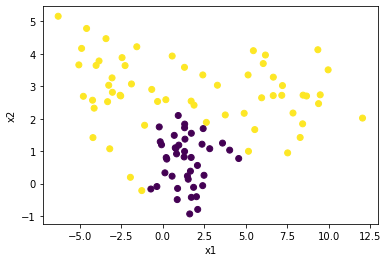

In [40]:
X = h5py.File('data.h5', 'r')['X']
y = h5py.File('data.h5', 'r')['y']

yhat_binary = np.array([])

for i in range(0, yhat.size):
    if yhat[0,i] < 0.5:
        yhat_binary = np.append(yhat_binary, 0)
    else:
        yhat_binary = np.append(yhat_binary, 1)




    
plt.scatter(X[0,:],X[1,:],c=yhat_binary)

plt.savefig('data_points_Adam.png')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

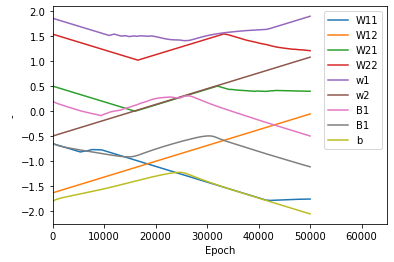

In [59]:
plt.plot(W11_array, label='W11')
plt.plot(W12_array, label='W12')
plt.plot(W21_array, label='W21')
plt.plot(W22_array, label='W22')
plt.plot(W1_array, label='w1')
plt.plot(W2_array, label='w2')
plt.plot(B1_array, label='B1')
plt.plot(B2_array, label='B1')
plt.plot(b_array, label='b')
plt.ylabel('-')
plt.xlabel('Epoch')
plt.legend()
plt.xlim(0, 65000)
plt.savefig('parameter_convergence_Adam_l2_0.1.png')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

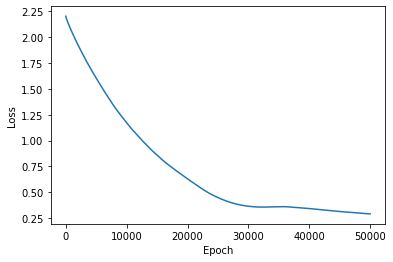

In [42]:
plt.plot(J_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('loss_convergence_Adam.png')
plt.show

In [ ]:
    #Saving parameters for plots
    J_array = np.append(J_array, J)
    W11 = opt.theta["w1"][0,0]
    W11_array = np.append(W11_array, W11)
    W12 = opt.theta["w1"][0,1]
    W12_array = np.append(W12_array, W12)
    W21 = opt.theta["w1"][1,0]
    W21_array = np.append(W21_array, W21)
    W22 = opt.theta["w1"][1,1]
    W22_array = np.append(W22_array, W22)
    W1 = opt.theta["w2"][0,0]
    W1_array = np.append(W1_array, W1)
    W2 = opt.theta["w2"][0,1]
    W2_array = np.append(W2_array, W2)
    B1 = opt.theta["b1"][0,0]
    B1_array = np.append(B1_array, B1)
    B2 = opt.theta["b1"][1,0]
    B2_array = np.append(B2_array, B2)
    b = opt.theta["b2"][0,0]
    b_array = np.append(b_array, b)

In [ ]:
J_array = np.array([])
W11_array = np.array([])
W12_array = np.array([])
W21_array = np.array([])
W22_array = np.array([])
W1_array = np.array([])
W2_array = np.array([])
B1_array = np.array([])
B2_array = np.array([])
b_array = np.array([])

In [11]:

theta_init = {'w1': np.array([[-0.65497431, -1.64259778],
                         [0.49698371,  1.53797914]]),
         'w2': np.array([[1.85627443, -0.50453944]]),
         'b1': np.array([[0.20787364],
                         [-0.63470021]]),
         'b2': np.array([[-1.82343559]])}


for key in range(1, int(len(theta_init) / 2)+1):
    print(key)
    
    
    

1
2
